In [75]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as st
import re
import sexmachine.detector as gender

In [2]:
gr_book = pd.read_csv('../../BookRatings/GoodReadsDataFrame.csv')
gr_authors =  pd.read_csv('./Data/AuthorGRDF2.csv')

In [3]:
gr_book2 = pd.read_csv('./Data/GoodReadsDataFrame2.csv')

In [4]:
# get the first author id as main writer when several authors
gr_book2.loc[:, 'main_id_author'] = gr_book2.id_author.apply(lambda x: int(x.split()[0]))

In [5]:
gr_book2.loc[:, 'num_contributors'] = gr_book2.id_author.apply(lambda x: len(x.split()))

In [6]:
gr_book2.id_author.apply(type).value_counts()

<class 'str'>    13905
Name: id_author, dtype: int64

In [7]:
BookInfo = pd.read_csv('./Data/BkProcessed.csv')

/home/kliton/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6,46,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
AuthorsInfo = pd.read_csv('./Data/AuthorsProcessed.csv')

In [9]:
def cohend(summary_df, indices=None, parameter = None):
    if indices is None:
        indices = [0, 1]
    if parameter is None:
        parameter = 'average_rating'
    meanDiff = summary_df.loc[indices[1], (parameter, 'mean')] - summary_df.loc[indices[0], (parameter, 'mean')]
    n0 = summary_df.loc[indices[0], (parameter, 'count')]
    n1 = summary_df.loc[indices[1], (parameter, 'count')]
    pooledVar = (n0*(summary_df.loc[indices[0], (parameter, 'std')]**2) + n1*(summary_df.loc[indices[1], (parameter, 'std')]**2))/(n0 + n1)
    denominator = np.sqrt(pooledVar)
    cohd = meanDiff / denominator
    return cohd

In [10]:
# create a dataframe that contains the gender of the author and the rating of the books
genderAverageDF = gr_book.join(gr_authors[['id', 'gender']].set_index('id'), on='id_author')[['average_rating', 'gender']]

In [11]:
genderAverageDF.groupby('gender').agg(['mean', 'std', 'count'])

average_rating                
                 mean       std count
gender                               
female        3.76494  0.468570  2899
male          3.79916  0.527343  4677

In [12]:
genderAverageDF.groupby('gender').agg(['mean', 'std', 'count'])

average_rating                
                 mean       std count
gender                               
female        3.76494  0.468570  2899
male          3.79916  0.527343  4677

In [13]:
gr_authors.tail()

,Unnamed: 0,about,author_followers_count,books,born_at,died_at,fans_count,gender,goodreads_author,hometown,id,image_url,influences,large_image_url,link,name,small_image_url,user,works_count
12092,14184,NaN,0,\n,NaN,NaN,0,NaN,NaN,NaN,152299,https://s.gr-assets.com/assets/nophoto/user/u_...,NaN,https://s.gr-assets.com/assets/nophoto/user/u_...,https://www.goodreads.com/author/show/152299.S...,Sheila Evans,https://s.gr-assets.com/assets/nophoto/user/u_...,NaN,15
12093,14185,Ignacio Solares (1945- ) is a prominent Mexica...,5,\n,NaN,NaN,5,male,NaN,Ciudad Juárez,33396,https://images.gr-assets.com/authors/139178493...,NaN,https://images.gr-assets.com/authors/139178493...,https://www.goodreads.com/author/show/33396.Ig...,Ignacio Solares,https://images.gr-assets.com/authors/139178493...,NaN,38
12094,14186,"Jean-Marie-Mathias-Philippe-Auguste, comte de ...",44,\n,1838/11/07,1889/08/18,44,male,NaN,Saint-Brieuc,6981879,https://images.gr-assets.com/authors/139401563...,Edgar Allan Poe,https://images.gr-assets.com/authors/139401563...,https://www.goodreads.com/author/show/6981879....,Villiers de L'Isle-Adam,https://images.gr-assets.com/authors/139401563...,NaN,110
12095,14187,NaN,1,\n,NaN,NaN,1,NaN,NaN,NaN,420110,https://s.gr-assets.com/assets/nophoto/user/u_...,NaN,https://s.gr-assets.com/assets/nophoto/user/u_...,https://www.goodreads.com/author/show/420110.M...,Maureen Brady,https://s.gr-assets.com/assets/nophoto/user/u_...,NaN,12
12096,14188,NaN,1,\n,NaN,NaN,1,NaN,NaN,NaN,591990,https://s.gr-assets.com/assets/nophoto/user/u_...,NaN,https://s.gr-assets.com/assets/nophoto/user/u_...,https://www.goodreads.com/author/show/591990.B...,Bonnie Zimmerman,https://s.gr-assets.com/assets/nophoto/user/u_...,NaN,8


/home/kliton/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


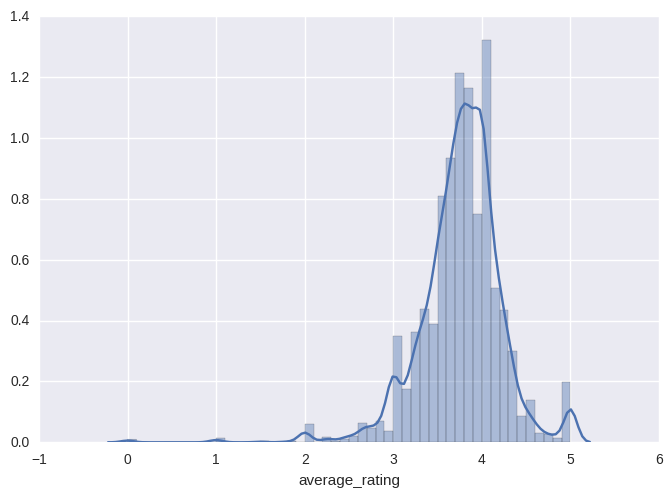

In [14]:
sns.distplot(genderAverageDF.average_rating[genderAverageDF.gender == 'female'] )

Test whether there is a statistical significant difference between the males/females ratings:

In [15]:
t_mf = (3.793 - 3.766)/np.sqrt((0.47**2)/2818 + (0.54**2)/4260)

In [16]:
t_mf

2.2281381755784753

In [17]:
1-st.norm.cdf(t_mf)

0.012935651127946368

Calculate the effect size with Cohen's d coeffiecient:

In [18]:
genderCohen = cohend(genderAverageDF.groupby('gender').agg(['mean', 'std', 'count']), indices=['female', 'male'])
genderCohen

0.067673951952977679

In [19]:
cohend(MainDF[['average_rating', 'Gender']][(MainDF.Gender == 'female') | (MainDF.Gender == 'male')].groupby('Gender').agg(['mean', 'std', 'count']), indices=['female', 'male'])


NameError: name 'MainDF' is not defined

In [57]:
calcTvalPval(MainDF[['average_rating', 'Gender']][(MainDF.Gender == 'female') | (MainDF.Gender == 'male')].groupby('Gender').agg(['mean', 'std', 'count']), indices=['female', 'male'])

(1.8225925376380914, 0.034182563349734352)

The effect size is very small. We won't consider there is a big difference between genders when it comes to average ratings. While the p-value indicates there is a significant statistical difference between the means, there is a large overlap between the gender group distributions.

Next, will see the average rating depending on the genres or topics.

In [20]:
# remove those genres that have less than 10 records count
GenresCount = BookInfo.dewey_parsed.value_counts()
GenreCountGT10 = GenresCount[GenresCount > 10]
GenreAverage = BookInfo[BookInfo.dewey_parsed.isin(GenreCountGT10.index)][['dewey_parsed', 'average_rating']]

In [21]:
# Dictionary that converts Dewey's classification codes to human readable labels
genresDictionary = {800 : "Literature and rhetoric", 801 : "Philosophy & theory", 802 : "Miscellany", 803 : "Dictionaries & encyclopedias", 804 : "not used", 805 : "Serial publications", 806 : "Organizations", 807 : "Education, research, related topics", 808 : "Rhetoric & collections of literature", 809 : "Literary history & criticism", 810 : "American or Canadian literature in English", 811 : "Poetry", 812 : "Drama", 813 : "Fiction", 814 : "Essays", 815 : "Speeches", 816 : "Letters", 817 : "Satire & humor", 818 : "Miscellaneous writings", 819 : "Without local emphasis", 820 : "English literature in English", 821 : "Poetry", 822 : "Drama", 823 : "Fiction", 824 : "Essays", 825 : "Speeches", 826 : "Letters", 827 : "Satire & humor", 828 : "Miscellaneous writings", 829 : "Old English", 830 : "Literatures of Germanic languages", 831 : "German poetry", 832 : "German drama", 833 : "German fiction", 834 : "German essays", 835 : "German speeches", 836 : "German letters", 837 : "German satire & humor", 838 : "German miscellaneous writings", 839 : "Other Germanic literatures", 840 : "Literatures of Romance languages", 841 : "French poetry", 842 : "French drama", 843 : "French fiction", 844 : "French essays", 845 : "French speeches", 846 : "French letters", 847 : "French satire & humor", 848 : "French miscellaneous writings", 849 : "Provençal & Catalan", 850 : "Italian, Romanian, Rhæto-Romanic", 851 : "Italian poetry", 852 : "Italian drama", 853 : "Italian fiction", 854 : "Italian essays", 855 : "Italian speeches", 856 : "Italian letters", 857 : "Italian satire & humor", 858 : "Italian miscellaneous writings", 859 : "Romanian & Rhæto-Romanic", 860 : "Spanish & Portuguese literatuers", 861 : "Spanish poetry", 862 : "Spanish drama", 863 : "Spanish fiction", 864 : "Spanish essays", 865 : "Spanish speeches", 866 : "Spanish letters", 867 : "Spanish satire & humor", 868 : "Spanish miscellaneous writings", 869 : "Portuguese", 870 : "Latin & Old Latin literatuers", 871 : "Latin poetry", 872 : "Latin dramatic poetry and drama", 873 : "Latin epic poetry and fiction", 874 : "Latin lyric poetry", 875 : "Latin speeches", 876 : "Latin letters", 877 : "Latin satire & humor", 878 : "Latin miscellaneous writings", 879 : "Literatures of other Italic languages", 880 : "Hellenic literatures; Classical Greek", 881 : "Classical Greek poetry", 882 : "Classical Greek dramatic poetry and drama", 883 : "Classical Greek epic poetry and fiction", 884 : "Classical Greek lyric poetry", 885 : "Classical Greek speeches", 886 : "Classical Greek letters", 887 : "Classical Greek satire & humor", 888 : "Classical Greek miscellaneous writings", 889 : "Modern Greek", 890 : "Literatures of other languages", 891 : "East Indo-European & Celtic literatures", 892 : "Afro-Asiatic literatures; Semitic", 893 : "Non-Semitic Afro-Asiatic literatures", 894 : "Ural-Altaic, Paleosiberian, Dravidian", 895 : "Literatures of East & Southeast Asia", 896 : "African literatures", 897 : "North American native literatures", 898 : "South American native literatures", 899 : "Other literatures"}

# convert codes to genres
GenreAverage['Genres'] = GenreAverage.dewey_parsed.apply(lambda x: genresDictionary[int(x)] if x.startswith('8') else x)

GenreAverage['IsPoetry'] = GenreAverage.Genres.apply(lambda x: 1 if 'poet' in x.lower() else 0) # ('poet' in GenreAverage.Genres.str.lower())

In [22]:
PoetVsAllRating = GenreAverage[['IsPoetry', 'average_rating']].groupby('IsPoetry').agg(['mean', 'std', 'count'])

In [23]:
PoetVsAllRating#.loc[0, ('average_rating', 'count')]

average_rating                 
                   mean       std  count
IsPoetry                                
0              3.720841  0.583668  10812
1              3.945525  0.683615   1218

In [24]:
#t-poet = (PoetVsAllRating.loc[1, ('average_rating', 'mean')] - PoetVsAllRating.loc[1, ('average_rating', 'mean')])

def calcTvalPval(summary_df, indices = None, parameter= None):
    if indices is None:
        indices = [0, 1]
    if parameter is None:
        parameter = 'average_rating'
    meanDiff = summary_df.loc[indices[1], (parameter, 'mean')] - summary_df.loc[indices[0], (parameter, 'mean')]
    denominator = np.sqrt(summary_df.loc[indices[0], (parameter, 'std')]**2/summary_df.loc[indices[0], (parameter, 'count')] +
                         summary_df.loc[indices[1], (parameter, 'std')]**2/summary_df.loc[indices[1], (parameter, 'count')])
    t_stat = meanDiff / denominator
    p_val = st.norm.cdf(t_stat)
    if meanDiff > 0:
        p_val = 1 - p_val 
    return (t_stat, p_val)

In [25]:
t_poetry = calcTvalPval(PoetVsAllRating)
t_poetry

(11.026743089384603, 0.0)

In [26]:
cohend_poetry = cohend(PoetVsAllRating)
cohend_poetry

0.37790542608717703

There is a small to medium effect size on whether a poetry book is highly rated versus other genres and that is not due to pure chance. Now, we can say with confidence that poetry is one of the high rated genres in literature.

In [27]:
GenreAverage['IsDrama'] = GenreAverage.Genres.apply(lambda x: 1 if 'drama' in x.lower() else 0)
DramaVsAllRating = GenreAverage[['IsDrama', 'average_rating']].groupby('IsDrama').agg(['mean', 'std', 'count'])
DramaVsAllRating

average_rating                 
                  mean       std  count
IsDrama                                
0             3.745678  0.592264  11568
1             3.691302  0.733779    462

In [28]:
t_drama = calcTvalPval(DramaVsAllRating)
t_drama

(-1.5724681891577477, 0.057921005485286524)

In [29]:
cohend_drama = cohend(DramaVsAllRating)
cohend_drama

-0.09088088767022158

The effect size is very small for drama average ratings versus all the other rated genres. The expectation that a drama book will have a poorer average rating than the mean is not very high.

In [30]:
GenreAverage['IsEssay'] = GenreAverage.Genres.apply(lambda x: 1 if 'essay' in x.lower() else 0)
EssayVsAllRating = GenreAverage[['IsEssay', 'average_rating']].groupby('IsEssay').agg(['mean', 'std', 'count'])
EssayVsAllRating

average_rating                 
                  mean       std  count
IsEssay                                
0             3.743154  0.598390  11945
1             3.804765  0.596143     85

In [31]:
t_essay = calcTvalPval(EssayVsAllRating)
t_essay

(0.94942636336607311, 0.17120190359986942)

In [32]:
cohend_essay = cohend(EssayVsAllRating)
cohend_essay

0.10296301037802262

There is no much difference between essay writings and average ratings. An essay rating would insignificantly higher than the average of all the other genres.

In [33]:
GenreAverage['IsFiction'] = GenreAverage.Genres.apply(lambda x: 1 if 'fiction' in x.lower() else 0)
FictionVsAllRating = GenreAverage[['IsFiction', 'average_rating']].groupby('IsFiction').agg(['mean', 'std', 'count'])
FictionVsAllRating

average_rating                
                    mean       std count
IsFiction                               
0               3.804852  0.679218  4584
1               3.705874  0.539241  7446

In [34]:
t_fiction = calcTvalPval(FictionVsAllRating)
t_fiction

(-8.3743434621910247, 2.7766291052510091e-17)

In [35]:
cohen_fiction = cohend(FictionVsAllRating)
cohen_fiction

-0.16594053219719135

There is a small size effect on the difference between the fiction genre average rating versus all the others. This difference is not happening purely by chance. Fiction is a genre with huge contribution to all other types of literature. Almost 2/3 of the books belong to fiction genre.

In [36]:
GenreAverage['IsCollection'] = GenreAverage.Genres.apply(lambda x: 1 if 'collect' in x.lower() else 0)
CollectionVsAllRating = GenreAverage[['IsCollection', 'average_rating']].groupby('IsCollection').agg(['mean', 'std', 'count'])
CollectionVsAllRating

average_rating                 
                       mean       std  count
IsCollection                                
0                  3.745627  0.593490  11647
1                  3.681621  0.729648    383

In [37]:
t_collection = calcTvalPval(CollectionVsAllRating)
t_collection

(-1.6983943112623112, 0.044716682534152272)

In [38]:
cohen_collection = cohend(CollectionVsAllRating)
cohen_collection

-0.10698063976684499

There is no significant difference between collections of literature average rating and average rating of other genres of literature.

In [39]:
GenreAverage['isbn'] = BookInfo[BookInfo.dewey_parsed.isin(GenreCountGT10.index)][['isbn10']]

In [40]:
import gender_guesser.detector as ggender

In [41]:
d = ggender.Detector(case_sensitive=False)

In [899]:
def retrieveGender(isbn):
    retVal = np.NaN
    for i in eval(isbn):
        if i in set(isbn_to_author.isbn):
            retVal = isbn_to_author[isbn_to_author.isbn == i].iloc[0, 1]
            name = isbn_to_author[isbn_to_author.isbn == i].iloc[0, 2]
            if (retVal is np.NaN) and (type(name) is str):
                firstName = name.split()
                retVal = d.get_gender(firstName[0])
            if retVal is not np.NaN:
                retVal = 1 if ('female' in retVal) else (0 if ('male' in retVal) else -1)  
            else:
                retVal = -1
            return retVal #isbn_to_author[isbn_to_author.isbn == i].iloc[0, 1]
        

In [275]:
def retrieveWorkCount(isbn):
    retVal = np.NaN
    for i in eval(isbn):
        if i in set(isbn_to_author.isbn):
            retVal = isbn_to_author[isbn_to_author.isbn == i].iloc[0, 5]
        return retVal

In [776]:
def retrieveFansCount(isbn):
    retVal = 0
    for i in eval(isbn):
        if i in set(isbn_to_author.isbn):
            retVal = isbn_to_author[isbn_to_author.isbn == i].iloc[0, 7]
        return retVal

In [775]:
isbn_to_author = gr_book2.join(gr_authors[['id', 'gender', 'name', 'born_at', 'died_at', 'works_count', 'fans_count']].set_index('id'), on='main_id_author')[['isbn', 'gender', 'name', 'born_at', 'died_at', 'works_count', 'num_contributors', 'fans_count']]

In [780]:
retrieveFansCount(BookInfo.isbn10[1000])

373.0

In [281]:
MainDF.loc[:, 'work_count'] = MainDF.isbn.apply(lambda x: retrieveWorkCount(x))

In [781]:
MainDF.loc[:, 'fans_count'] = MainDF.isbn.apply(lambda x: retrieveFansCount(x))

In [783]:
np.corrcoef(MainDF.fans_count[~MainDF.fans_count.isnull()], MainDF.average_rating[~MainDF.fans_count.isnull()])

array([[ 1.        ,  0.03869809],
       [ 0.03869809,  1.        ]])

In [131]:
AgePublishDF

,average_rating,born_at,died_at,publication_year
0,3.00,NaN,NaN,1997.0
1,3.00,NaN,NaN,1997.0
2,3.80,NaN,NaN,1997.0
3,4.00,NaN,NaN,1997.0
4,4.00,NaN,NaN,1997.0
5,3.62,NaN,NaN,1997.0
6,3.50,NaN,NaN,1998.0
7,3.50,NaN,NaN,1998.0
8,4.12,1901/12/13,1941/01/01,2000.0
9,3.97,NaN,NaN,1998.0


In [44]:
GenreAverage.loc[:, ('Gender')] = GenreAverage.isbn.apply(lambda x: retrieveGender(x))

In [45]:
GenreAverage.Gender.value_counts()

male             6647
female           4537
unknown           500
mostly_female     161
mostly_male       135
andy               45
Name: Gender, dtype: int64

In [46]:
GenreAverage.groupby(['IsEssay', 'Gender']).agg(['mean', 'count'])

average_rating        IsPoetry         IsDrama        \
                                mean count      mean count      mean count   
IsEssay Gender                                                               
0       andy                3.837444    45  0.200000    45  0.000000    45   
        female              3.735870  4519  0.069263  4519  0.016375  4519   
        male                3.755113  6589  0.120807  6589  0.053422  6589   
        mostly_female       3.632138   159  0.081761   159  0.037736   159   
        mostly_male         3.642121   132  0.106061   132  0.060606   132   
        unknown             3.702994   496  0.147177   496  0.044355   496   
1       female              3.678611    18  0.000000    18  0.000000    18   
        male                3.850517    58  0.000000    58  0.000000    58   
        mostly_female       4.480000     2  0.000000     2  0.000000     2   
        mostly_male         3.700000     3  0.000000     3  0.000000     3   
        unknown             3.450000     4  0.000000     4  0.000000     4   

                      IsFiction       IsCollection        
                           mean count         mean count  
IsEssay Gender                                            
0       andy           0.488889    45     0.044444    45  
        female         0.668511  4519     0.026997  4519  
        male           0.607224  6589     0.033389  6589  
        mostly_female  0.547170   159     0.056604   159  
        mostly_male    0.590909   132     0.037879   132  
        unknown        0.473790   496     0.046371   496  
1       female         0.000000    18     0.000000    18  
        male           0.000000    58     0.000000    58  
        mostly_female  0.000000     2     0.000000     2  
        mostly_male    0.000000     3     0.000000     3  
        unknown        0.000000     4     0.000000     4

In [47]:
isbn_to_author.tail()

,isbn,gender,name,born_at,died_at,works_count,num_contributors
13900,1888934107,NaN,Sheila Evans,NaN,NaN,15.0,1
13901,9682706289,male,Ignacio Solares,NaN,NaN,38.0,1
13902,2843100127,male,Villiers de L'Isle-Adam,1838/11/07,1889/08/18,110.0,1
13903,1558610782,NaN,Maureen Brady,NaN,NaN,12.0,2
13904,1558610790,NaN,Maureen Brady,NaN,NaN,12.0,2


In [804]:
isbn_to_author[isbn_to_author.num_contributors == 0]

,isbn,gender,name,born_at,died_at,works_count,num_contributors,fans_count


### Test the effect of the page numbers on the average rating

In [48]:
MainDF = GenreAverage

In [127]:
MainDF.Gender.value_counts()

male             6647
female           4537
unknown           500
mostly_female     161
mostly_male       135
andy               45
Name: Gender, dtype: int64

In [49]:
def retrieveNumPages(isbn):
    retVal = np.NaN
    for i in eval(isbn):
        if i in set(gr_book.isbn):
            retVal = gr_book[gr_book.isbn == i].num_pages.iloc[0]
            if retVal is np.NaN:
                continue
        return retVal

In [323]:
set_isbn = set(gr_book.isbn)
def retrieveTitles(isbn_list):
    retVal = ''
    books = eval(isbn_list)
    for i in books:
        if i in set_isbn:
            try:
                retVal = gr_book[gr_book.isbn == i].title
               
                if (retVal is np.NaN) or retVal == '':
                    continue
            except:
                print(i)
    return retVal if type(retVal) == str else retVal.values[0]

In [340]:
#retrieveTitles("['0807811459']")
#'0901241369' in set_isbn
#eval("['0901241369', '0901241377']")
MainDF.loc[MainDF.isbn == "['0807811459']", 'title'] = 'From puzzles to portraits'
#gr_book2[gr_book2.isbn == '0807811459']
#BookInfo[BookInfo.isbn10 == "['0807811459']"].title
MainDF[MainDF.isbn == "['0807811459']"]

,dewey_parsed,average_rating,Genres,IsPoetry,IsDrama,IsEssay,IsFiction,IsCollection,isbn,Gender,...,title,num_words_title,num_contributors,publication_year,birth_year,birth_to_pub_interval,pages_no_group,num_contributors_log,work_count,work_count_log
5479,808,3.0,Rhetoric & collections of literature,0,0,0,0,1,['0807811459'],None,...,From puzzles to portraits,4,0,1970,NaN,NaN,2,0.0,NaN,NaN


In [59]:
Titles_Serie = MainDF.isbn.apply(lambda x: retrieveTitles(x) )

In [60]:
MainDF.loc[:, 'title'] = Titles_Serie

In [339]:
MainDF.loc[:, 'num_words_title'] = MainDF.title.apply(lambda x: len(x.split()))

In [62]:
isbn_ind_book = gr_book2.set_index('isbn')
def retrieveNumContributors(isbn_list):
    retVal = 0
    for i in eval(isbn_list):
        if i in set_isbn:
            try:
                retVal = isbn_ind_book.loc[i, 'num_contributors']
                if retVal is np.NaN:
                    continue
                if type(retVal) is pd.core.series.Series:
                    retVal = retVal.iloc[0]
            except:
                print(isbn_list)
        return retVal 

In [63]:
type(isbn_ind_book.loc['0865380724', 'num_contributors'])

pandas.core.series.Series

In [64]:
isbn_ind_book.loc['0865380724', 'num_contributors'].iloc[0]

2

In [65]:
MainDF.loc[:, 'num_contributors'] = MainDF.isbn.apply(lambda x: retrieveNumContributors(x))

In [812]:
#retrieveNumContributors("['0807811459']")
isbn_ind_book.loc['0807811459', 'num_contributors']

KeyError: 'the label [0807811459] is not in the [index]'

In [66]:
AuthorsInfo.birthdate_parsed.isnull().value_counts()
gr_authors.born_at.isnull().value_counts()
len(AuthorsInfo), len(gr_authors)

True     4560
False    4183
Name: birthdate_parsed, dtype: int64

True     8339
False    3758
Name: born_at, dtype: int64

(8743, 12097)

In [67]:
MainDF.loc[:, 'average_rating'] = BookInfo[BookInfo.dewey_parsed.isin(GenreCountGT10.index)][['average_rating']]

In [68]:
MainDF.columns

Index(['dewey_parsed', 'average_rating', 'Genres', 'IsPoetry', 'IsDrama',
       'IsEssay', 'IsFiction', 'IsCollection', 'isbn', 'Gender', 'pagesNo',
       'first_isbn', 'title', 'num_words_title', 'num_contributors'],
      dtype='object')

/home/kliton/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
/home/kliton/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/home/kliton/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


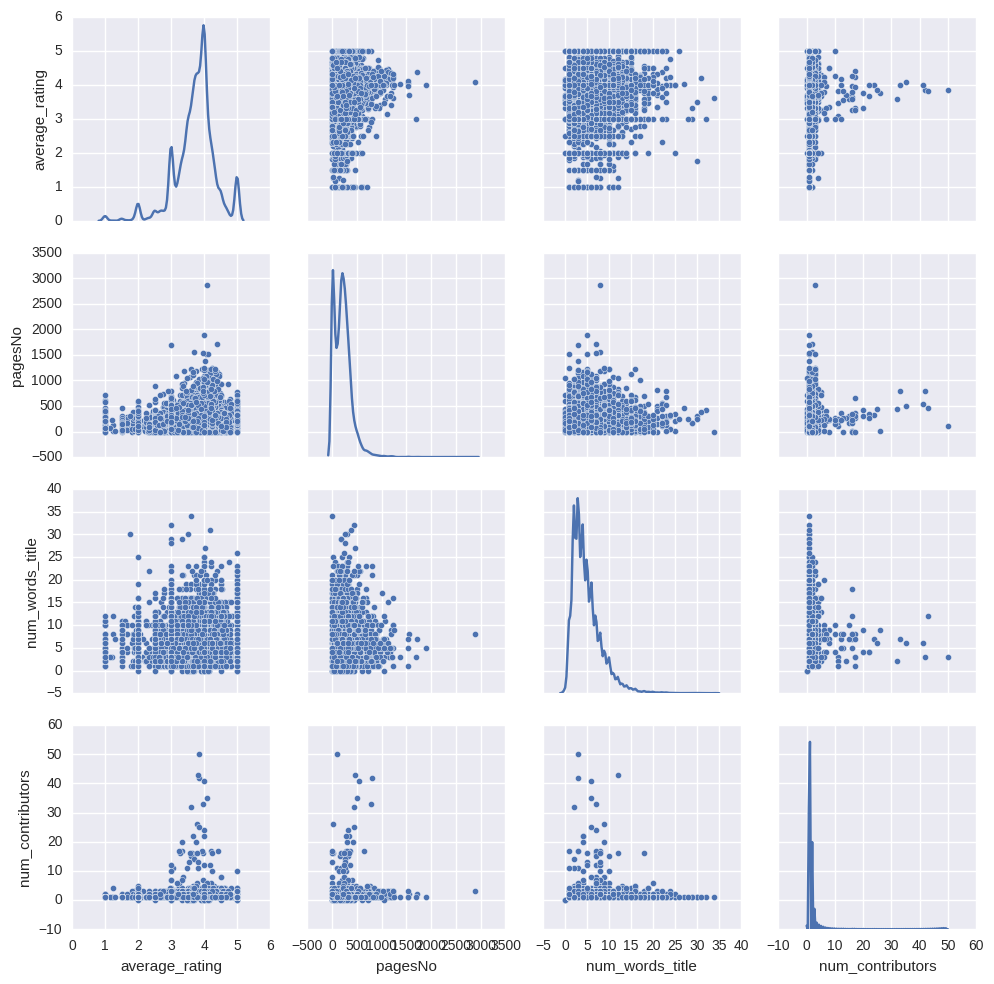

In [69]:
sns.pairplot(MainDF[['average_rating', 'pagesNo', 'num_words_title', 'num_contributors']], diag_kind="kde")

/home/kliton/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
/home/kliton/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/home/kliton/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/home/kliton/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


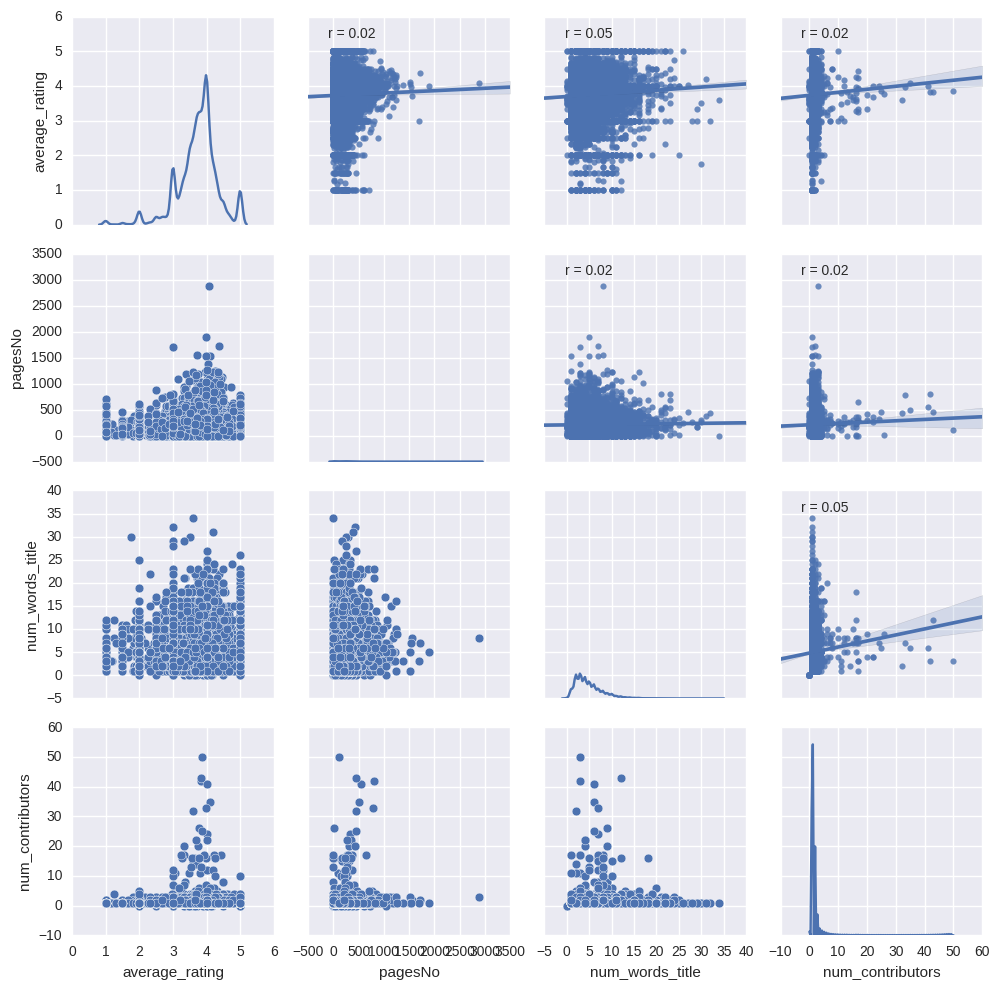

In [76]:
import numpy as np
from scipy import stats

def corrfunc(x, y, **kws):
    x_1 = x[~(np.isnan(x) | np.isnan(y))]
    y_1 = y[~(np.isnan(x) | np.isnan(y))]
    r, _ = stats.pearsonr(x_1, y_1)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

g = sns.PairGrid(MainDF[['average_rating', 'pagesNo', 'num_words_title', 'num_contributors']])
g = g.map_upper(sns.regplot)
g = g.map_upper(corrfunc)
g = g.map_diag(sns.kdeplot)
g = g.map_lower(plt.scatter, edgecolor="w", s=40)

In [394]:
#len(MainDF[MainDF.birth_year < 1900])
#MainDF.loc[:, 'birth_to_pub_interval'] = MainDF.publication_year - MainDF.birth_year
#MainDF.loc[:, 'pages_no_group'] = MainDF.pagesNo.apply(lambda x: getGroupSize(x, 'numeric'))
#MainDF.loc[MainDF.pages_no_group != 'Undefined', 'pages_no_group'] = pd.to_numeric(MainDF.pages_no_group[MainDF.pages_no_group != 'Undefined'], errors='ignore')
#MainDF[MainDF.pages_no_group != 'Undefined'].pages_no_group.describe()
#MainDF.pages_no_group[86]
#MainDF.loc[:, 'num_contributors_log'] = MainDF.num_contributors.apply(lambda x: np.log10(x+1))
#MainDF[(~MainDF.birth_year.isnull()) & (MainDF.birth_year > 1800) & (MainDF.publication_year > 1900) & (MainDF.pages_no_group != 'Undefined') ].Genres
#MainDF.pagesNo.apply(np.sqrt)
#MainDF[(~MainDF.birth_year.isnull()) & (MainDF.birth_year > 1800) & (MainDF.publication_year > 1900) & (MainDF.pages_no_group != 'Undefined') ].average_rating.hist()
#gr_book.columns, gr_book2.columns, gr_authors.columns, AuthorsInfo.columns, isbn_to_author.columns
#MainDF[(~MainDF.birth_year.isnull()) & (MainDF.birth_year > 1800) & (MainDF.publication_year > 1900) & (MainDF.pages_no_group != 'Undefined') & (MainDF.average_rating > 2.3) & (MainDF.publication_year > 1960)].num_words_title.apply(lambda x: np.log10(x+0.5)).hist()
#MainDF.loc[:, 'work_count_log'] = MainDF.work_count.apply(np.log10)
#MainDF[(~MainDF.birth_year.isnull()) & (MainDF.birth_year > 1800) & (MainDF.publication_year > 1900) & (MainDF.pages_no_group != 'Undefined') & (MainDF.average_rating > 2.3) & (MainDF.publication_year > 1960) & (MainDF.num_words_title ==0)]gr
#MainDF[(~MainDF.birth_year.isnull()) & (MainDF.birth_year > 1800) & (MainDF.publication_year > 1900) & (MainDF.pages_no_group != 'Undefined') & (MainDF.average_rating > 2.3) & (MainDF.publication_year > 1960)].num_words_title.apply(np.log10).hist(alpha=0.5)
#MainDF.loc[:, 'num_words_title_log'] = MainDF.num_words_title.apply(lambda x: np.log10(x+0.5))
#MainDF.loc[:, 'pagesNo_log102'] = MainDF.pagesNo.apply(lambda x: np.log10(x + 2))
#MainDF.pagesNo.apply(lambda x: np.log10(x + 3)).hist(alpha=0.5)
#MainDF[(~MainDF.birth_year.isnull()) & (MainDF.birth_year > 1800) & (MainDF.publication_year > 1900) & (MainDF.pages_no_group != 'Undefined') & (MainDF.average_rating > 2.3) & (MainDF.publication_year > 1960)].birth_to_pub_interval.apply(np.log10).hist()
#MainDF.loc[:, 'birth_to_pub_log'] = MainDF.birth_to_pub_interval.apply(np.log10)
len(MainDF[(~MainDF.birth_year.isnull()) & (MainDF.birth_year > 1800) & (MainDF.publication_year > 1900) & (MainDF.pages_no_group != 'Undefined') & (MainDF.average_rating > 2.3) & (MainDF.publication_year > 1960) & (MainDF.birth_to_pub_log > 1)])

4730

/home/kliton/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
/home/kliton/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/home/kliton/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/home/kliton/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


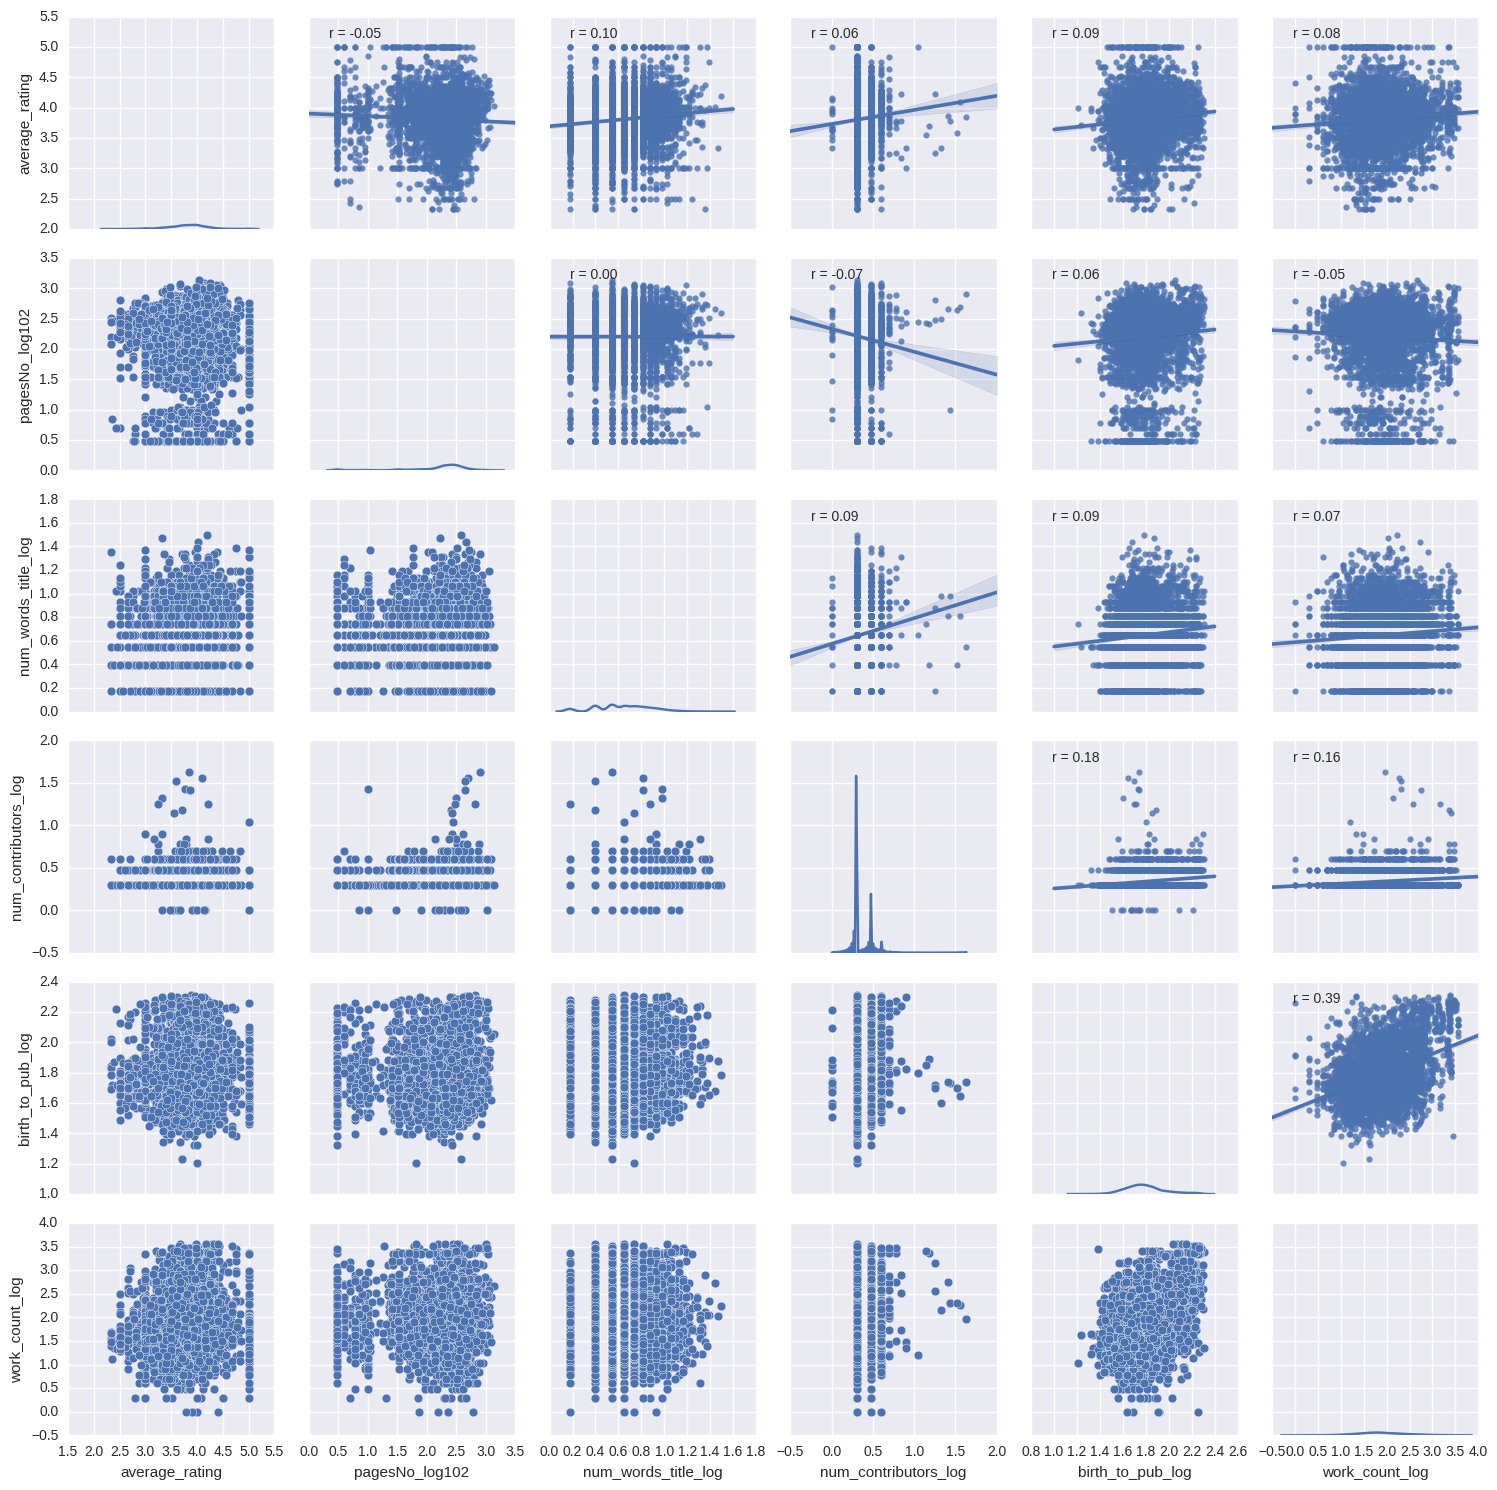

In [393]:
g = sns.PairGrid(MainDF[(~MainDF.birth_year.isnull()) & (MainDF.birth_year > 1800) & (MainDF.publication_year > 1900) & (MainDF.pages_no_group != 'Undefined') & (MainDF.average_rating > 2.3) & (MainDF.publication_year > 1960) & (MainDF.birth_to_pub_log > 1)][['average_rating', 'pagesNo_log102', 'num_words_title_log', 'num_contributors_log',  'birth_to_pub_log', 'work_count_log']])
#'publication_year', 'birth_year','birth_to_pub_interval', 
g = g.map_upper(sns.regplot)
g = g.map_upper(corrfunc)
g = g.map_diag(sns.kdeplot)
g = g.map_lower(plt.scatter, edgecolor="w", s=40)

In [223]:
pageIntervals = [(0, 100), (100, 800), (800, np.Infinity)]
groupSize = ['S', 'M', 'L']
groupSizeN = [1, 2, 3]

def getGroupSize(num_pages, groupType=''):
    gs = 'Undefined'
    for i in range(0, len(pageIntervals), 1):
        if  pageIntervals[i][0]< num_pages < pageIntervals[i][1] :
            gs = (groupSize[i] if groupType == '' else groupSizeN[i])
    return gs;

In [77]:
book_size_df = gr_book[['num_pages', 'average_rating']]
book_size_df.loc[:, ('Size')] = book_size_df.num_pages.apply(lambda x: getGroupSize(x))

/home/kliton/.local/lib/python3.5/site-packages/pandas/core/indexing.py:296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/kliton/.local/lib/python3.5/site-packages/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [78]:
BookSizeSummary = book_size_df[['Size', 'average_rating']].groupby('Size').agg(['mean', 'std', 'count'])
BookSizeSummary

average_rating                
                    mean       std count
Size                                    
L               4.052547  0.476109   106
M               3.729346  0.630363  7340
S               3.769074  0.684800  2085
Undefined       3.720194  0.726717  4374

In [52]:
# retrieve the pages no
BookInfo['pagesNo'] = BookInfo.pagination.apply(lambda x: list(filter(None, re.findall('\d*', string=x))) if type(x)==str else x)

# missing pages or invalid one are set to 0 
BookInfo.loc[:, ('pagesNo')] = BookInfo.pagesNo.apply(lambda x: max(x) if (type(x)==list and len(x)>0) else (0 if (type(x)==list and len(x)==0) else x))

#convert the pages to int
BookInfo.loc[:, ('pagesNo')] = BookInfo.pagesNo.apply(lambda x: int(x) if type(x) != float else x)

In [55]:
MainDF.loc[:, ('pagesNo')] = BookInfo[BookInfo.dewey_parsed.isin(GenreCountGT10.index)][['pagesNo']]

In [56]:
MainDF.loc[:, 'first_isbn'] = MainDF.isbn.apply(lambda x: eval(x)[0])

In [79]:
BookInfo.loc[:, ('SizeGroup')] = BookInfo.pagesNo.apply(lambda x: getGroupSize(x))

In [80]:
BookSizeSummary2 = BookInfo[['SizeGroup', 'average_rating']].groupby('SizeGroup').agg(['mean', 'std', 'count'])
BookSizeSummary2

average_rating                
                    mean       std count
SizeGroup                               
L               3.994189  0.363683   111
M               3.721800  0.584268  8531
S               3.804961  0.660171  2787
Undefined       3.767280  0.554143   761

In [81]:
cohend_LM = cohend(summary_df=BookSizeSummary.loc[['L', 'M'], :], indices=['L', 'M'])
cohend_LS = cohend(summary_df=BookSizeSummary.loc[['L', 'S'], :], indices=['L', 'S'])
cohend_SM = cohend(summary_df=BookSizeSummary.loc[['S', 'M'], :], indices=['S', 'M'])
cohend_LM, cohend_LS, cohend_SM

(-0.51429726931338837, -0.41922213338116349, -0.061804815568311251)

In [82]:
calcTvalPval(BookSizeSummary.loc[['M', 'S'],:], indices=['M', 'S']), calcTvalPval(BookSizeSummary.loc[['M', 'L'],:], indices=['M', 'L'])

((2.3782478455957832, 0.0086975647781404319),
 (6.9022459077161242, 2.5592861163659109e-12))

*There is a medium effect size on the average rating between the large books and medium/small ones. Large books have a higher average rating. The medium sized books have the lowest average ratings. Small sized books have an average rating between the large and small books.*

1. Check rating with the format (Hardcover, Paperback)
2. Check the rating with the number of works per author. Build hypothesis for authors with more than one literature work
3. Age of the author at the publication year

In [83]:
FormatDF = gr_book[['average_rating', 'format']]
FormatDF.loc[:, 'format'] = FormatDF.format.str.lower()
FormatDF.fillna(method='pad', inplace=True)
FormatDF.loc[:, 'format'] = FormatDF.format.apply(lambda x: 'hardcover' if 'hardcover' in x else ('paperback' if 'paperback' in x else x) )
FormatDF = FormatDF.groupby('format').agg(['mean', 'std', 'count'])
FormatDF.head()

/home/kliton/.local/lib/python3.5/site-packages/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/kliton/.local/lib/python3.5/site-packages/pandas/core/frame.py:2842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


average_rating                
                         mean       std count
format                                       
audio                3.940000  0.207284     7
audio cassette       3.853333  0.298719     3
audio cd             3.905556  0.321913     9
board book           3.699333  0.633229    60
broché               4.000000       NaN     1

In [84]:
cohend_format = cohend(FormatDF.loc[['hardcover', 'paperback'], :], indices=['hardcover', 'paperback'])
cohend_format

0.03011541825283743

The Cohen's d coefficient is very small. There is not much different between the average ratings based on the format of the book.

In [85]:
gr_book #[['average_rating', 'id_author']].transform()

,Unnamed: 0,average_rating,average_rating_author,books_count,country_code,description,edition_information,format,id,id_author,...,publisher,rating_dist,ratings_count,ratings_count_author,reviews_count,role_author,text_reviews_count,text_reviews_count_author,title,url
0,0,3.00,4.00,2,US,How does our understanding of African culture ...,NaN,Paperback,5082313,106205,...,Zed Books,5:0|4:0|3:2|2:0|1:0|total:2,2,22,3,Editor,0,2,"Writing African Women: Gender, Popular Culture...",https://www.goodreads.com/book/show/5082313-wr...
1,1,3.00,4.00,2,US,How does our understanding of African culture ...,NaN,Paperback,1271896,106205,...,Zed Books,5:0|4:0|3:2|2:0|1:0|total:2,0,22,3,Editor,0,2,"Writing African Women: Gender, Popular Culture...",https://www.goodreads.com/book/show/1271896.Wr...
2,2,3.80,3.34,4,US,This compelling novel depicts the devastating ...,NaN,Paperback,1466769,54973,...,Arte Publico Press,5:3|4:6|3:6|2:0|1:0|total:15,9,95,35,NaN,0,8,Disparo En La Catedral = A Shot in the Cathedral,https://www.goodreads.com/book/show/1466769.Di...
3,3,4.00,4.19,3,US,Drew's oldest friends accuse him of snobbery w...,NaN,Hardcover,2172988,331241,...,HarperCollins Publishers,5:0|4:1|3:0|2:0|1:0|total:1,0,32,7,NaN,0,6,Drew and the Homeboy Question,https://www.goodreads.com/book/show/2172988.Dr...
4,4,4.00,4.19,3,US,When Drew Taylor wins a scholarship to Deerwoo...,NaN,Paperback,611491,331241,...,HarperTrophy,5:0|4:1|3:0|2:0|1:0|total:1,1,32,7,NaN,0,6,Drew and the Homeboy Question,https://www.goodreads.com/book/show/611491.Dre...
5,5,3.62,3.95,5,US,In this second book featuring Ernestine and Am...,NaN,Hardcover,371755,98975,...,Simon & Schuster Children's Publishing,5:1|4:3|3:4|2:0|1:0|total:8,7,7008,17,Illustrator,1,1742,Summer Camp: Ready or Not!,https://www.goodreads.com/book/show/371755.Sum...
6,6,3.50,4.08,7,US,"Leo's little brother, Louie, couldn't do anyth...",NaN,Hardcover,5332842,5480,...,HarperCollins,5:6|4:11|3:12|2:4|1:1|total:34,3,14034,68,Illustrator,1,1074,Little Louie the Baby Bloomer,https://www.goodreads.com/book/show/5332842-li...
7,7,3.50,3.98,7,US,"Leo's little brother, Louie, couldn't do anyth...",NaN,Hardcover,8557874,5479,...,HarperCollins Publishers,5:6|4:11|3:12|2:4|1:1|total:34,0,4717,68,Illustrator,0,525,Little Louie The Baby Bloomer,https://www.goodreads.com/book/show/8557874-li...
8,8,4.12,4.07,15,US,"First published in the United States in 1934, ...",NaN,Paperback,596557,324457,...,Ecco Press,5:92|4:108|3:31|2:11|1:3|total:245,10,270,726,NaN,2,31,The Quest for Corvo: An Experiment in Biography,https://www.goodreads.com/book/show/596557.The...
9,9,3.97,3.55,4,US,Parents and children alike will love this irre...,NaN,Hardcover,943073,479624,...,Doubleday Books for Young Readers,5:11|4:12|3:8|2:2|1:0|total:33,30,56,69,NaN,7,13,Music over Manhattan,https://www.goodreads.com/book/show/943073.Mus...


In [86]:
AgePublishDF=gr_book.join(gr_authors[['id', 'born_at', 'died_at']].set_index('id'), on='id_author')[['average_rating', 'born_at', 'died_at', 'publication_year']]

In [170]:
#AgePublishDF.loc[:, 'years_since_birth'] = 
#AgePublishDF.publication_year - 
AgePublishDF.born_at

'1901/12/13'

In [87]:
gr_authors.born_at.isnull().value_counts()

True     8339
False    3758
Name: born_at, dtype: int64

In [135]:
AuthorsInfo

,Unnamed: 0,alternate_names,bio,bio.type,bio.value,birth_date,comment,created.type,created.value,date,...,revision,role,tags,title,type.key,website,wikipedia,birthdate_parsed,deathdate_parsed,age
0,0,['Strong Jeremy'],NaN,NaN,NaN,1949,NaN,/type/datetime,2008-04-01T03:28:50.625462,NaN,...,3,NaN,NaN,NaN,/type/author,NaN,NaN,1949-04-05 00:00:00,NaN,68.0
1,0,NaN,NaN,NaN,NaN,1943,NaN,NaN,NaN,NaN,...,2,NaN,NaN,NaN,/type/author,NaN,NaN,1943-04-05 00:00:00,NaN,74.0
2,0,NaN,NaN,NaN,NaN,1878,NaN,/type/datetime,2008-04-01T03:28:50.625462,NaN,...,3,NaN,NaN,NaN,/type/author,NaN,NaN,1878-04-05 00:00:00,1956-04-05 00:00:00,78.0
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,/type/author,NaN,NaN,NaN,NaN,NaN
4,0,"['Waugh/Evelyn', 'Evelyn. Waugh']",NaN,NaN,NaN,1903,NaN,/type/datetime,2008-04-01T03:28:50.625462,NaN,...,3,NaN,NaN,NaN,/type/author,NaN,NaN,1903-04-05 00:00:00,1966-04-05 00:00:00,63.0
5,0,NaN,NaN,NaN,NaN,1974,NaN,NaN,NaN,NaN,...,2,NaN,NaN,NaN,/type/author,NaN,NaN,1974-04-05 00:00:00,NaN,43.0
6,0,NaN,NaN,NaN,NaN,1949,NaN,NaN,NaN,NaN,...,2,NaN,NaN,NaN,/type/author,NaN,NaN,1949-04-05 00:00:00,NaN,68.0
7,0,"['Grazia, Deledda']",NaN,/type/text,"Italian writer. In 1926, Grazia Deledda was aw...",1871,NaN,/type/datetime,2008-04-01T03:28:50.625462,NaN,...,6,NaN,NaN,NaN,/type/author,NaN,NaN,1871-04-05 00:00:00,1936-04-05 00:00:00,65.0
8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,NaN,NaN,NaN,/type/author,NaN,NaN,NaN,NaN,NaN
9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,NaN,NaN,NaN,/type/author,NaN,NaN,NaN,NaN,NaN


In [89]:
MainDF[['average_rating', 'Gender']][(MainDF.IsPoetry == 1) & ((MainDF.Gender == 'female') | (MainDF.Gender == 'male'))].groupby(['Gender']).agg(['mean', 'count'])

average_rating      
                 mean count
Gender                     
female       3.949979   313
male         3.941183   796

In [90]:
cohend(MainDF[['average_rating', 'Gender']][(MainDF.IsPoetry == 1) & ((MainDF.Gender == 'female') | (MainDF.Gender == 'male'))].groupby(['Gender']).agg(['mean', 'std', 'count']), indices=['female', 'male'])
calcTvalPval(MainDF[['average_rating', 'Gender']][(MainDF.IsPoetry == 1) & ((MainDF.Gender == 'female') | (MainDF.Gender == 'male'))].groupby(['Gender']).agg(['mean', 'std', 'count']), indices=['female', 'male'])

-0.013295009437045237

(-0.18707800629686303, 0.4257997360743549)

In [91]:
MainDF[['average_rating', 'Gender']][(MainDF.IsDrama == 1) & ((MainDF.Gender == 'female') | (MainDF.Gender == 'male'))].groupby(['Gender']).agg(['mean', 'std', 'count'])

average_rating                
                 mean       std count
Gender                               
female       3.721284  0.755640    74
male         3.683542  0.708847   352

In [92]:
cohend(MainDF[['average_rating', 'Gender']][(MainDF.IsDrama == 1) & ((MainDF.Gender == 'female') | (MainDF.Gender == 'male'))].groupby(['Gender']).agg(['mean', 'std', 'count']), indices=['female', 'male'])
calcTvalPval(MainDF[['average_rating', 'Gender']][(MainDF.IsDrama == 1) & ((MainDF.Gender == 'female') | (MainDF.Gender == 'male'))].groupby(['Gender']).agg(['mean', 'std', 'count']), indices=['female', 'male'])

-0.05262468973604293

(-0.39470137043500642, 0.34653164563130012)

In [93]:
MainDF[['average_rating', 'Gender']][(MainDF.IsEssay == 1) & ((MainDF.Gender == 'female') | (MainDF.Gender == 'male'))].groupby(['Gender']).agg(['mean', 'count'])

average_rating      
                 mean count
Gender                     
female       3.678611    18
male         3.850517    58

In [94]:
cohend(MainDF[['average_rating', 'Gender']][(MainDF.IsEssay == 1) & ((MainDF.Gender == 'female') | (MainDF.Gender == 'male'))].groupby(['Gender']).agg(['mean', 'std', 'count']), indices=['female', 'male'])
calcTvalPval(MainDF[['average_rating', 'Gender']][(MainDF.IsEssay == 1) & ((MainDF.Gender == 'female') | (MainDF.Gender == 'male'))].groupby(['Gender']).agg(['mean', 'std', 'count']), indices=['female', 'male'])

0.31947089409466972

(0.98160622780286733, 0.16314693908120392)

In [95]:
MainDF[['average_rating', 'Gender']][(MainDF.IsFiction == 1) & ((MainDF.Gender == 'female') | (MainDF.Gender == 'male'))].groupby(['Gender']).agg(['mean', 'count'])

average_rating      
                 mean count
Gender                     
female       3.708013  3021
male         3.717203  4001

In [96]:
cohend(MainDF[['average_rating', 'Gender']][(MainDF.IsFiction == 1) & ((MainDF.Gender == 'female') | (MainDF.Gender == 'male'))].groupby(['Gender']).agg(['mean', 'std', 'count']), indices=['female', 'male'])
calcTvalPval(MainDF[['average_rating', 'Gender']][(MainDF.IsFiction == 1) & ((MainDF.Gender == 'female') | (MainDF.Gender == 'male'))].groupby(['Gender']).agg(['mean', 'std', 'count']), indices=['female', 'male'])

0.017430962530932157

(0.72669863125978262, 0.23370529605074719)

In [97]:
MainDF[['average_rating', 'Gender']][(MainDF.IsCollection == 1) & ((MainDF.Gender == 'female') | (MainDF.Gender == 'male'))].groupby(['Gender']).agg(['mean', 'count'])

average_rating      
                 mean count
Gender                     
female       3.685129   122
male         3.718250   220

In [98]:
cohend(MainDF[['average_rating', 'Gender']][(MainDF.IsCollection == 1) & ((MainDF.Gender == 'female') | (MainDF.Gender == 'male'))].groupby(['Gender']).agg(['mean', 'std', 'count']), indices=['female', 'male'])
calcTvalPval(MainDF[['average_rating', 'Gender']][(MainDF.IsCollection == 1) & ((MainDF.Gender == 'female') | (MainDF.Gender == 'male'))].groupby(['Gender']).agg(['mean', 'std', 'count']), indices=['female', 'male'])

0.047120873450823351

(0.4113486256688958, 0.34040845948750742)

In [99]:
cohend(MainDF[['average_rating', 'Gender']][(MainDF.Genres == 'Educational') & ((MainDF.Gender == 'female') | (MainDF.Gender == 'male'))].groupby(['Gender']).agg(['mean', 'std', 'count']), indices=['female', 'male'])
calcTvalPval(MainDF[['average_rating', 'Gender']][(MainDF.Genres == 'Educational') & ((MainDF.Gender == 'female') | (MainDF.Gender == 'male'))].groupby(['Gender']).agg(['mean', 'std', 'count']), indices=['female', 'male'])

0.10181877028599115

(1.656145079468939, 0.048846221055720784)

In [100]:
MainDF[['average_rating', 'Gender']][(MainDF.Genres == 'Educational') & ((MainDF.Gender == 'female') | (MainDF.Gender == 'male'))].groupby(['Gender']).agg(['mean', 'std', 'count'])

average_rating                
                 mean       std count
Gender                               
female       3.747596  0.562549   701
male         3.806811  0.610023   450

In [101]:
MainDF[['pagesNo', 'Gender']][(MainDF.Gender == 'female') | (MainDF.Gender == 'male')].groupby('Gender').agg(['mean', 'std', 'count'])

pagesNo                  
              mean         std count
Gender                              
female  193.758583  165.308564  4515
male    226.658408  181.457956  6619

In [102]:
cohend(MainDF[['pagesNo', 'Gender']][(MainDF.Gender == 'female') | (MainDF.Gender == 'male')].groupby('Gender').agg(['mean', 'std', 'count']), indices=['female', 'male'], parameter='pagesNo')
calcTvalPval(MainDF[['pagesNo', 'Gender']][(MainDF.Gender == 'female') | (MainDF.Gender == 'male')].groupby('Gender').agg(['mean', 'std', 'count']), indices=['female', 'male'], parameter='pagesNo')

0.18790367692825097

(9.9074777358781088, 0.0)

In [103]:
MainDF.columns

Index(['dewey_parsed', 'average_rating', 'Genres', 'IsPoetry', 'IsDrama',
       'IsEssay', 'IsFiction', 'IsCollection', 'isbn', 'Gender', 'pagesNo',
       'first_isbn', 'title', 'num_words_title', 'num_contributors'],
      dtype='object')

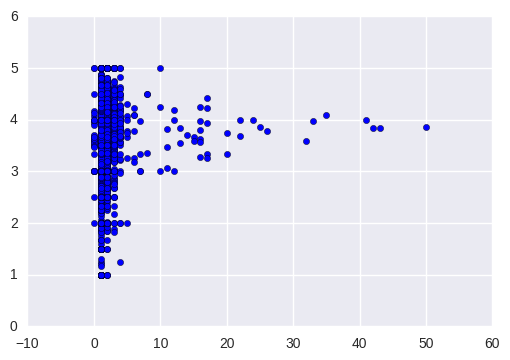

In [104]:
#sns.regplot(data=MainDF, x='num_contributors', y='average_rating', fit_reg=False)
#MainDF.num_contributors = MainDF.num_contributors.apply(pd.to_numeric)
#MainDF.plot.scatter(x='num_contributors', y='average_rating')

plt.scatter(x=MainDF.num_contributors, y=pd.to_numeric(MainDF.average_rating) )

In [105]:
MainDF[MainDF.num_contributors.apply(type) != np.int64].iloc[0] #[MainDF.num_contributors == 

dewey_parsed                                                      820
average_rating                                                      3
Genres                                  English literature in English
IsPoetry                                                            0
IsDrama                                                             0
IsEssay                                                             0
IsFiction                                                           0
IsCollection                                                        0
isbn                                     ['1856494497', '1856494500']
Gender                                                         female
pagesNo                                                           204
first_isbn                                                 1856494497
title               Writing African Women: Gender, Popular Culture...
num_words_title                                                    11
num_contributors    

In [106]:
BookInfo.subject_place

0                        ['Africa, West', 'Africa, West.']
1                                                      NaN
2                                                      NaN
3                                                      NaN
4                                                      NaN
5                                                      NaN
6                                      ['New York (N.Y.)']
7                                                      NaN
8                                                      NaN
9        ['Southwest, New', 'Santa Fe (N.M.)', 'New Mex...
10                                                     NaN
11                                                     NaN
12                                                     NaN
13                                              ['France']
14                                                     NaN
15                                                     NaN
16                                   ['England', 'Russia

In [107]:
MainDF.loc[:, 'publication_year'] = BookInfo[BookInfo.dewey_parsed.isin(GenreCountGT10.index)].publish_date

In [108]:
MainDF.loc[:, 'publication_year'] = MainDF.publication_year.apply(lambda x: 0 if re.search(string=str(x), pattern=r'\d\d\d\d') == None else re.search(string=str(x), pattern=r'\d\d\d\d').group())
#re.search(string='13Dec1983', pattern=r'\d\d\d\d') == None

In [176]:
#BookInfo[BookInfo.dewey_parsed.isin(GenreCountGT10.index)].isbn10
def retrieveBirthDate(isbn):
    retVal = np.NaN
    for i in eval(isbn):
        if i in set(isbn_to_author.isbn):
            retVal = isbn_to_author[isbn_to_author.isbn == i].iloc[0, 3]
            if (retVal is not np.NaN) and (type(retVal) is str):
                retVal = retVal[0:4]
            return retVal #isbn_to_author[isbn_to_author.isbn == i].iloc[0, 1]

In [179]:
MainDF.loc[:, 'birth_year'] = MainDF.isbn.apply(retrieveBirthDate)

In [187]:
MainDF.birth_year.isnull().value_counts()
#AuthorsInfo.birthdate_parsed.isnull().value_counts()

True     6791
False    5239
Name: birth_year, dtype: int64

In [436]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
lasso = linear_model.Lasso()
ridge = linear_model.Ridge()

In [533]:
x_gauss, y_gauss = np.random.multivariate_normal([1, 2], np.matrix([[1, 0.8], [0.8, 2]]), 1000).T
scores2 = cross_val_score(linear_model.Ridge(), 
                         x_gauss.reshape(-1, 1) ,#X=x_t[~x_t.work_count_log.isnull()], #
                         y_gauss.reshape(-1, 1) * 1000,#y=y_t[~x_t.work_count_log.isnull()].values , 
                         cv=4, scoring='neg_mean_squared_error')
print(scores2.mean(), scores2.std())

-1345993.51181 107861.822273


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

(array([   5.,   25.,   67.,  175.,  233.,  248.,  140.,   70.,   30.,    7.]),
 array([ -197.94983272,   246.53772352,   691.02527975,  1135.51283599,
         1580.00039223,  2024.48794847,  2468.97550471,  2913.46306094,
         3357.95061718,  3802.43817342,  4246.92572966]),
 <a list of 10 Patch objects>)

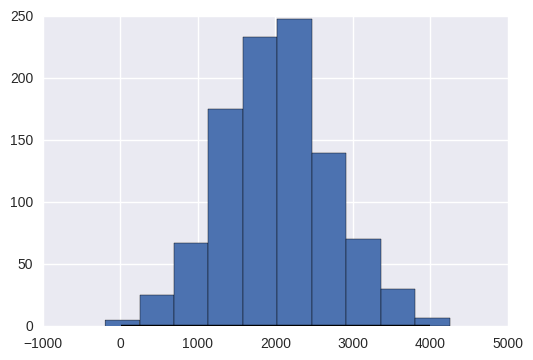

In [536]:
#del GradientBoostingRegressor, RandomForestRegressor, DecisionTreeRegressor
#x_t.loc[~x_t.work_count_log.isnull(), 'num_contributors_log'].reshape(len(x_t), 1)
#y_t.loc[~x_t.work_count_log.isnull()].shape 
#x_t.num_contributors_log.shape
lm.fit(x_gauss.reshape(-1,1), y_gauss.reshape(-1, 1) * 1000)
#lm.coef_, lm.intercept_
#plt.scatter(lm.predict(x_gauss.reshape(-1, 1)), 
#            lm.predict(x_gauss.reshape(-1, 1)) - y_gauss.reshape(-1, 1)*1000, c='b', s=40, alpha=0.5)
#plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=1, xmax = 4000);
plt.hist(lm.predict(x_gauss.reshape(-1, 1)))

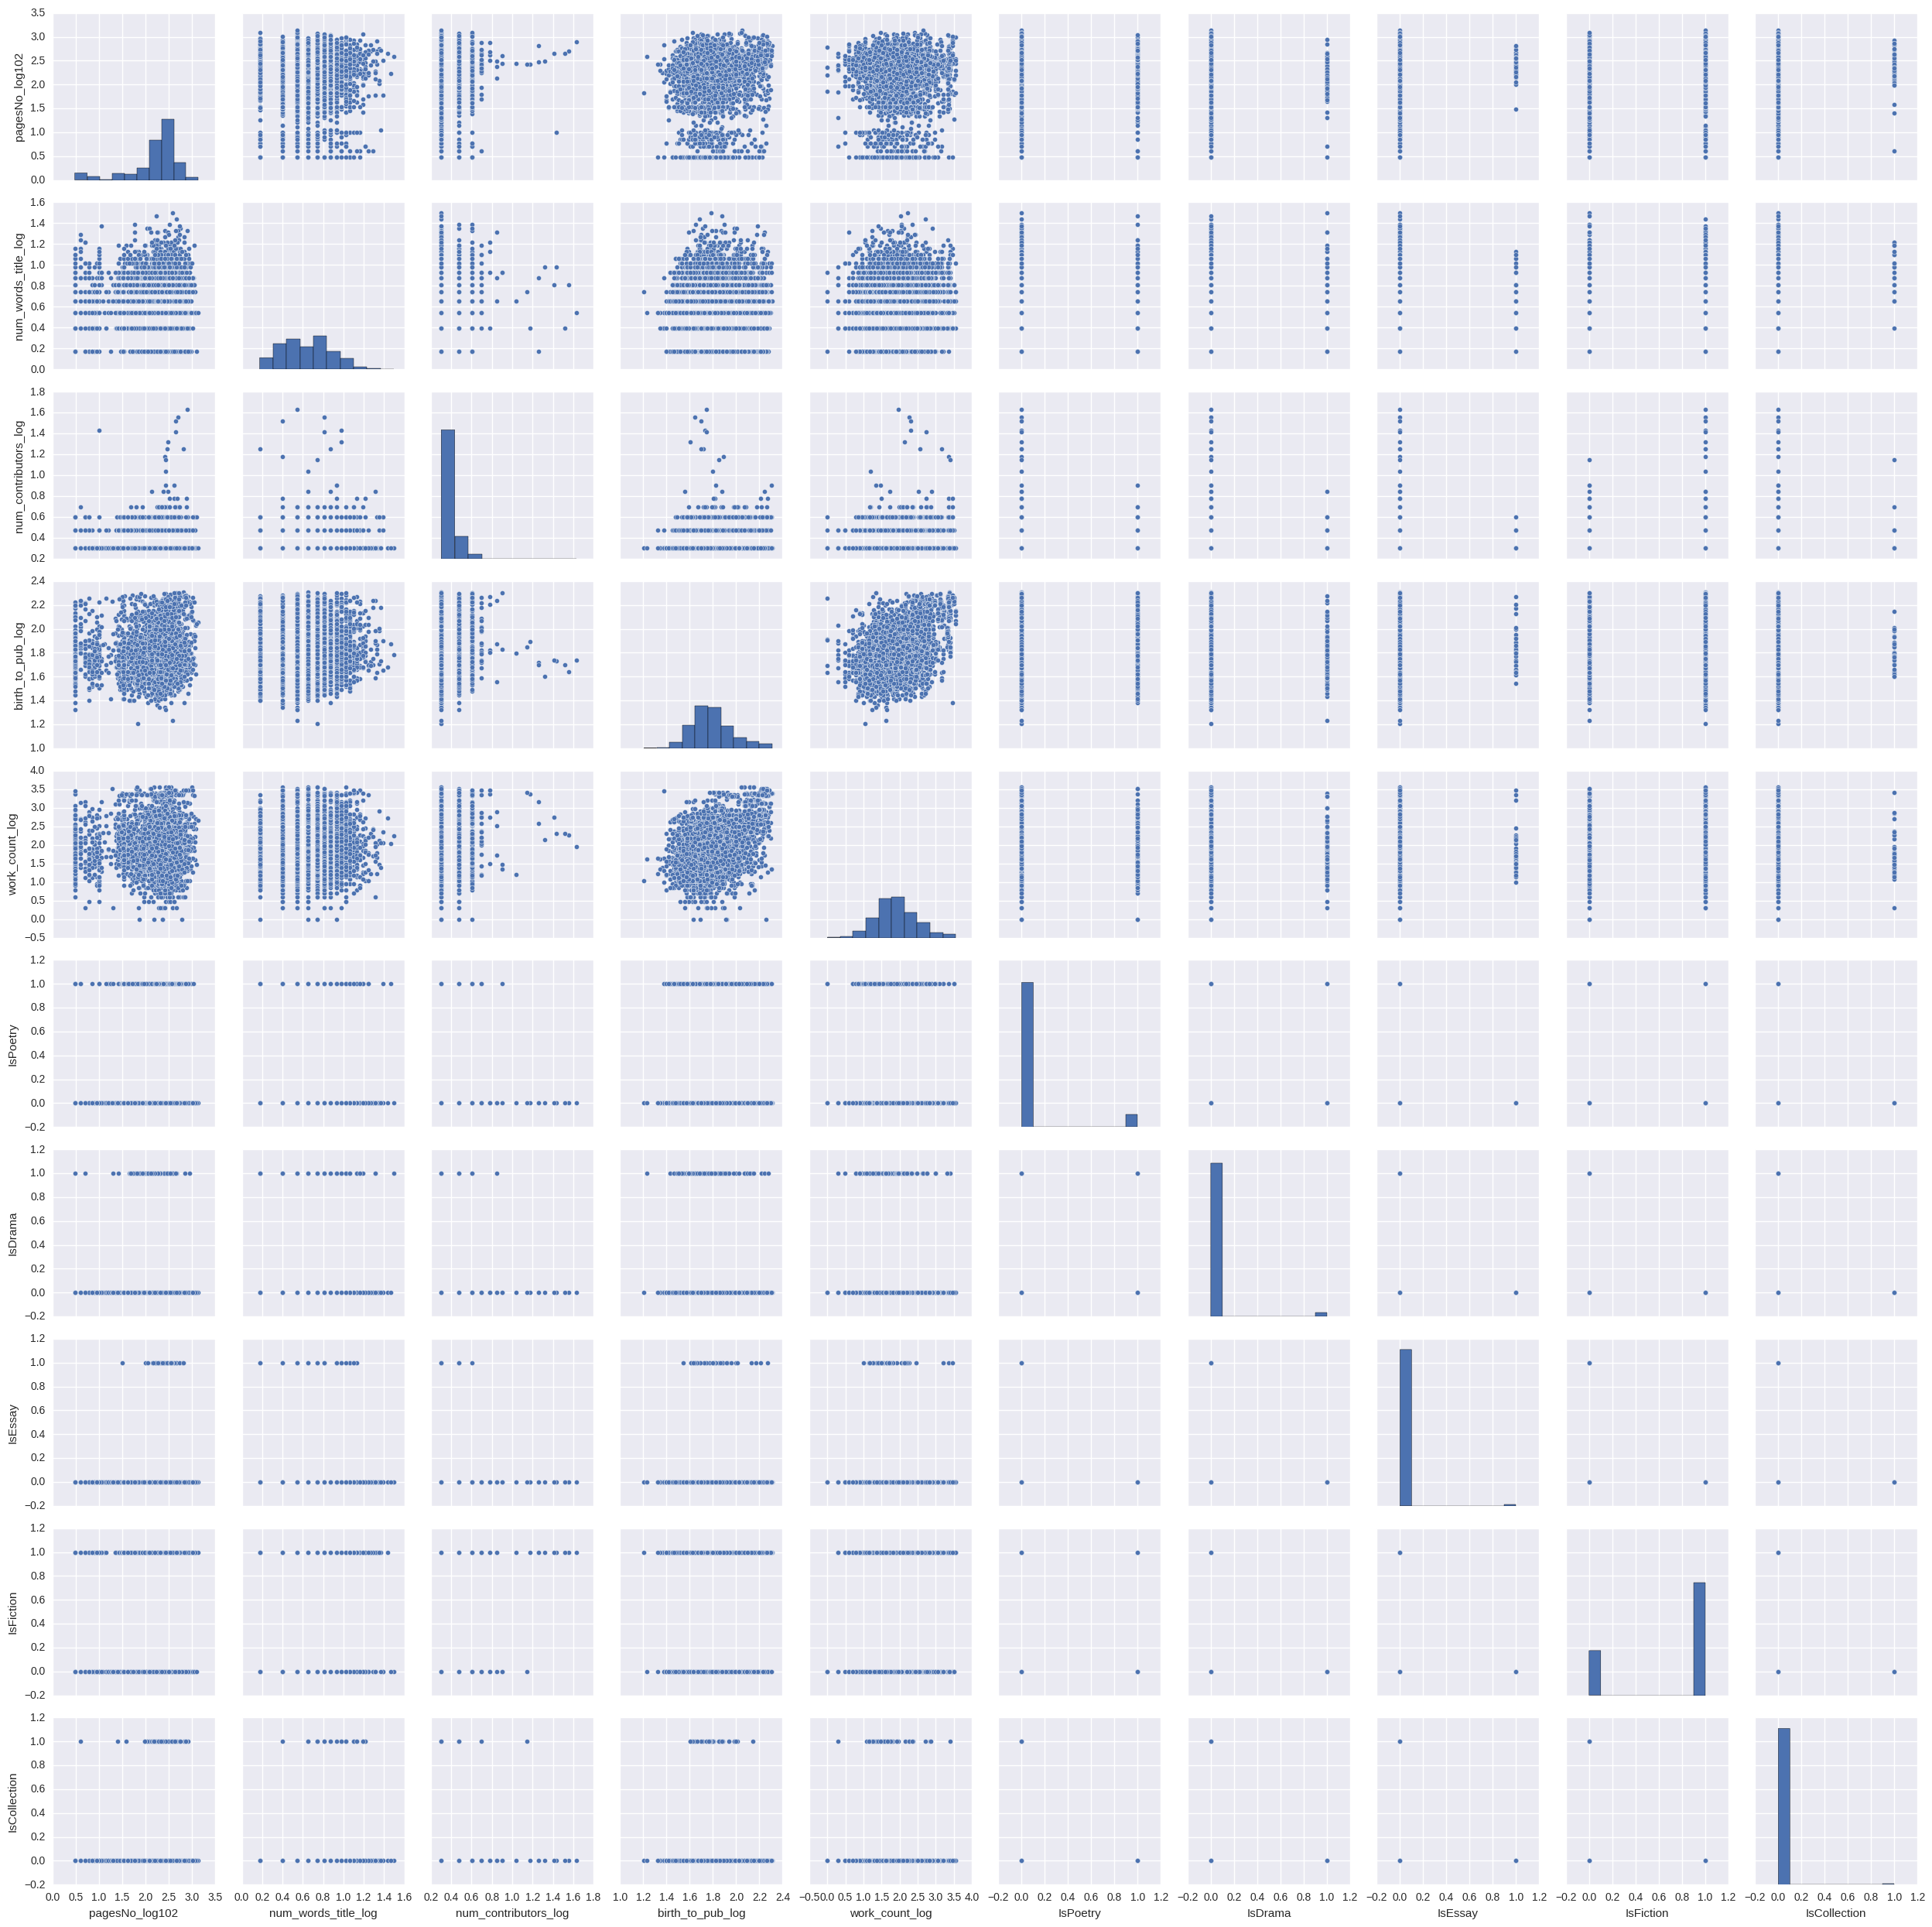

In [418]:

sns.pairplot(x_t[~x_t.work_count_log.isnull()])
#x_t[~x_t.work_count_log.isnull()].work_count_log.isnull().value_counts()

In [670]:
from sklearn.model_selection import train_test_split
x_t_lr, x_t_tst, y_lrn, y_tst = train_test_split(x_t[~x_t.work_count_log.isnull()].values, 
                                                 y_t[~x_t.work_count_log.isnull()].values, random_state=10)

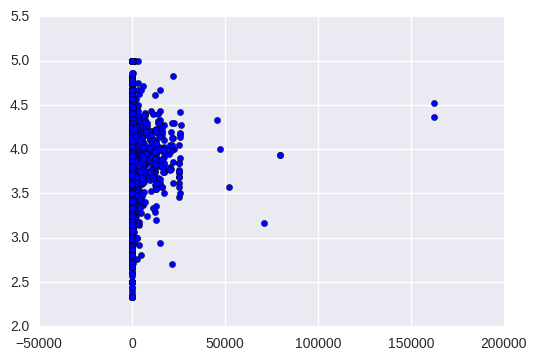

In [789]:
#stats.pearsonr(x_t.fans_count, y_t.average_rating)
plt.scatter(x_t.fans_count, y_t.average_rating)

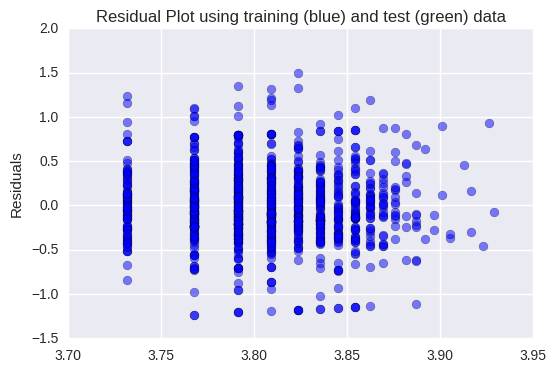

In [786]:
#x_t = MainDF[(~MainDF.birth_year.isnull()) & (MainDF.birth_year > 1800) & (MainDF.publication_year > 1900) & (MainDF.pages_no_group != 'Undefined') & (MainDF.average_rating > 2.3) & (MainDF.publication_year > 1960) & (MainDF.birth_to_pub_log > 1)][[ 'pagesNo_log102', 'num_words_title_log', 'num_contributors_log',  'birth_to_pub_log', 'work_count_log', 'IsPoetry', 'IsDrama', 'IsEssay', 'IsFiction', 'IsCollection', 'fans_count']] 
#MainDF[['pagesNo', 'num_words_title', 'num_contributors', 'IsPoetry', 'IsDrama', 'IsEssay', 'IsFiction', 'IsCollection', 'publication_year']].fillna(MainDF[['pagesNo', 'num_words_title', 'num_contributors', 'publication_year']].median())
#y_t = MainDF[(~MainDF.birth_year.isnull()) & (MainDF.birth_year > 1800) & (MainDF.publication_year > 1900) & (MainDF.pages_no_group != 'Undefined') & (MainDF.average_rating > 2.3) & (MainDF.publication_year > 1960) & (MainDF.birth_to_pub_log > 1)][['average_rating']]
lm.fit(x_t_lr[:, [1]],
       y_lrn)
plt.scatter(lm.predict(x_t_tst[:, [1]]), 
            lm.predict(x_t_tst[:, [1]]) - y_tst, c='b', s=40, alpha=0.5)
#plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
#plt.hlines(y = 0, xmin=1, xmax = 5);
plt.title('Residual Plot using training (blue) and test (green) data');
plt.ylabel('Residuals');


/home/kliton/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


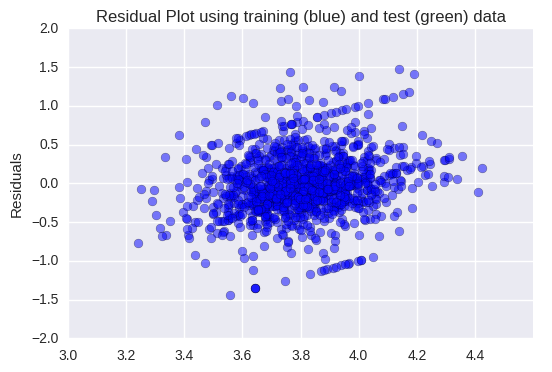

In [688]:
#from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators=100)
rfregressor.fit(x_t_lr, 
                y_lrn)
plt.scatter(rfregressor.predict(x_t_tst), 
            rfregressor.predict(x_t_tst).ravel() - y_tst.ravel(), c='b', s=40, alpha=0.5)
#plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
#plt.hlines(y = 0, xmin=1, xmax = 5);
plt.title('Residual Plot using training (blue) and test (green) data');
plt.ylabel('Residuals');

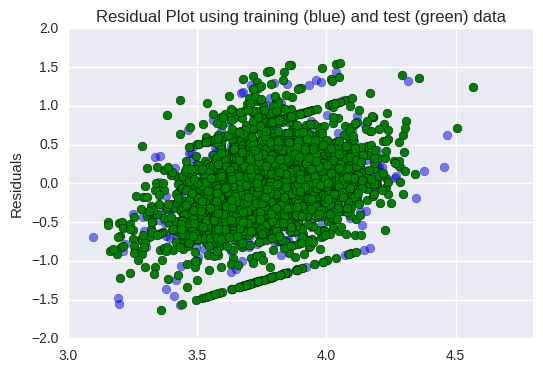

In [695]:
from sklearn.linear_model import RANSACRegressor

RANSAC = RANSACRegressor()
RANSAC.fit(x_t_lr, y_lrn)
plt.scatter(RANSAC.predict(x_t_tst), 
            RANSAC.predict(x_t_tst).ravel() - y_tst.ravel(), c='b', s=40, alpha=0.5)
plt.scatter(RANSAC.predict(x_t_lr), RANSAC.predict(x_t_lr) - y_lrn, c='g', s=40)
#plt.hlines(y = 0, xmin=1, xmax = 5);
plt.title('Residual Plot using training (blue) and test (green) data');
plt.ylabel('Residuals');

In [114]:
scores = cross_val_score(lm,  X=MainDF[['pagesNo', 'num_words_title', 'num_contributors', 'IsPoetry', 'IsDrama', 'IsEssay', 'IsFiction', 'IsCollection']].fillna(MainDF[['pagesNo', 'num_words_title', 'num_contributors']].median()) , y=MainDF.average_rating.values.reshape(len(MainDF.average_rating), 1), cv=4, scoring='neg_mean_squared_error')
print(scores)
print("MSE: %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std()))

[-0.34582242 -0.35431941 -0.3572374  -0.35062894]
MSE: 0.35 (+/- 0.00)


In [711]:
from sklearn.linear_model import Lasso, LarsCV, Ridge, RidgeCV, LassoCV, HuberRegressor, ElasticNet, Lars, TheilSenRegressor

In [704]:
def evaluateEstimator(estimator):
    estimator.fit(x_t_lr, y_lrn)
    plt.scatter(estimator.predict(x_t_tst),
                estimator.predict(x_t_tst).ravel() - y_tst.ravel(), c='b', s=40, alpha=0.5)
    #plt.scatter(RANSAC.predict(x_t_lr), RANSAC.predict(x_t_lr) - y_lrn, c='g', s=40)
    #plt.hlines(y = 0, xmin=1, xmax = 5);
    plt.title('Residual Plot using training (blue) and test (green) data');
    plt.ylabel('Residuals');

In [799]:
#evaluateEstimator(Lars())
#evaluateEstimator(Ridge())
#evaluateEstimator(HuberRegressor())
#evaluateEstimator(TheilSenRegressor())
lars_cv = LarsCV()
lars_cv.fit(x_t_lr, y_lrn)


/home/kliton/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LarsCV(copy_X=True, cv=None, eps=2.2204460492503131e-16, fit_intercept=True,
    max_iter=500, max_n_alphas=1000, n_jobs=1, normalize=True,
    positive=False, precompute='auto', verbose=False)

In [713]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QuadraticDiscriminantAnalysis()

QDA(priors=None, reg_param=0.0, store_covariances=False, tol=0.0001)

In [116]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
scores = cross_val_score(regressor,  MainDF[['pagesNo', 'num_words_title', 'num_contributors', 'IsPoetry', 'IsDrama', 'IsEssay', 'IsFiction', 'IsCollection']].fillna(MainDF[['pagesNo', 'num_words_title', 'num_contributors']].median()) , MainDF.average_rating.values.reshape(len(MainDF.average_rating), 1), cv=4, scoring='neg_mean_squared_error')
print(scores)
print("MSE: %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std()))

[-0.62346909 -0.60121254 -0.6168254  -0.6023221 ]
MSE: 0.61 (+/- 0.01)


In [117]:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators=100)
scores = cross_val_score(rfregressor,  MainDF[['pagesNo', 'num_words_title', 'num_contributors', 'IsPoetry', 'IsDrama', 'IsEssay', 'IsFiction', 'IsCollection']].fillna(MainDF[['pagesNo', 'num_words_title', 'num_contributors']].median()) , MainDF.average_rating.values, cv=4, scoring='neg_mean_squared_error')
print(scores)
print("MSE: %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std()))

[-0.42958305 -0.42825983 -0.44413917 -0.43466877]
MSE: 0.43 (+/- 0.01)


In [118]:
rfregressor.fit(MainDF[['pagesNo', 'num_words_title', 'num_contributors', 'IsPoetry', 'IsDrama', 'IsEssay', 'IsFiction', 'IsCollection']].fillna(MainDF[['pagesNo', 'num_words_title', 'num_contributors']].median()),  MainDF.average_rating.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [119]:
features=['pagesNo', 'num_words_title', 'num_contributors', 'IsPoetry', 'IsDrama', 'IsEssay', 'IsFiction', 'IsCollection']
for i in rfregressor.feature_importances_.argsort():
    print(features[i])
print(rfregressor.feature_importances_)
print(rfregressor.feature_importances_.argmax, rfregressor.feature_importances_)

IsEssay
IsPoetry
IsCollection
IsDrama
IsFiction
num_contributors
num_words_title
pagesNo
[ 0.58638487  0.24732164  0.06098307  0.01818948  0.02087164  0.00536642
  0.04245818  0.0184247 ]
<built-in method argmax of numpy.ndarray object at 0x7f7aa8429a80> [ 0.58638487  0.24732164  0.06098307  0.01818948  0.02087164  0.00536642
  0.04245818  0.0184247 ]


In [120]:
print(sorted(zip(map(lambda x: round(x, 4), rfregressor.feature_importances_), features), 
             reverse=True))

[(0.58640000000000003, 'pagesNo'), (0.24729999999999999, 'num_words_title'), (0.060999999999999999, 'num_contributors'), (0.042500000000000003, 'IsFiction'), (0.020899999999999998, 'IsDrama'), (0.0184, 'IsCollection'), (0.018200000000000001, 'IsPoetry'), (0.0054000000000000003, 'IsEssay')]


In [121]:
from sklearn.ensemble import GradientBoostingRegressor
gbregressor = GradientBoostingRegressor()
scores = cross_val_score(gbregressor,  MainDF[['pagesNo', 'num_words_title', 'num_contributors', 'IsPoetry', 'IsDrama', 'IsEssay', 'IsFiction', 'IsCollection']].fillna(MainDF[['pagesNo', 'num_words_title', 'num_contributors']].median()), y=MainDF.average_rating.values, cv=4, scoring='neg_mean_squared_error')
print(scores)
print("MSE: %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std()))

[-0.3451424  -0.34976802 -0.35662251 -0.34889206]
MSE: 0.35 (+/- 0.00)


In [122]:
MainDF.Genres.value_counts()

Fiction                                       5714
Educational                                   1256
Fictional                                     1192
Poetry                                        1004
Rhetoric & collections of literature           383
Drama                                          374
Miscellaneous writings                         262
French fiction                                 234
Spanish fiction                                169
East Indo-European & Celtic literatures        169
Literary history & criticism                   141
American or Canadian literature in English     116
English literature in English                  110
Essays                                          85
German fiction                                  80
Literatures of East & Southeast Asia            77
Other Germanic literatures                      66
Spanish poetry                                  65
French miscellaneous writings                   47
Philosophy & theory            

In [123]:
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import r2_score
from collections import defaultdict

scores = defaultdict(list)

y_t = MainDF.average_rating.values.reshape(len(MainDF.average_rating), 1)
 
#crossvalidate the scores on a number of different random splits of the data
for train_idx, test_idx in ShuffleSplit(len(x_t), 100, .3):
    X_train, X_test = x_t.iloc[train_idx, :], x_t.iloc[test_idx, :]
    Y_train, Y_test = y_t[train_idx], y_t[test_idx]
    r = rfregressor.fit(X_train, Y_train.ravel())
    acc = r2_score(Y_test, rfregressor.predict(X_test))
    for i in range(x_t.shape[1]):
        X_t = X_test.values
        np.random.shuffle(X_t[:, i])
        shuff_acc = r2_score(Y_test, rfregressor.predict(X_t))
        scores[x_t.columns[i]].append((acc-shuff_acc)/acc)
print("Features sorted by their score:")
print(sorted([(round(np.mean(score), 4), feat) for
              feat, score in scores.items()], reverse=True))

/home/kliton/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Features sorted by their score:
[(-0.0001, 'IsEssay'), (-0.0095999999999999992, 'IsDrama'), (-0.0143, 'IsFiction'), (-0.028500000000000001, 'IsCollection'), (-0.063799999999999996, 'publication_year'), (-0.065699999999999995, 'num_contributors'), (-0.22439999999999999, 'num_words_title'), (-0.24940000000000001, 'IsPoetry'), (-0.35310000000000002, 'pagesNo')]


In [565]:
gr_authors.loc[:, 'IsIllustrator'] = (~gr_authors.about.isnull()) & (gr_authors.about.str.contains('(.*illustr.*)|(.*carto.*)'))

/home/kliton/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':


In [566]:
gr_authors.IsIllustrator.value_counts()

False    11631
True       466
Name: IsIllustrator, dtype: int64

In [656]:
def isIllustrated(isbn):
    retVal = 0
    for book in eval(isbn):
        ids = gr_book2[gr_book2.isbn == book].id_author
        if len(ids) > 0:
            ids = ids.values[0].split()
        else:
            return 0
        if len(ids) > 1:
            for authId in ids[1:]:
                val = gr_authors[gr_authors.id == np.int64(authId)].IsIllustrator.values
                if len(val) > 0 and val[0]:
                    return 1
    return retVal

In [901]:
MainDF.loc[:, 'gender'] = MainDF.isbn.apply(retrieveGender)
#retrieveGender("['089594152X']")


In [913]:
BookInfo.subject_place.isnull().value_counts()#.iloc[100] #.apply(lambda x: len(eval(str(x) ))).value_counts()

True     8985
False    3205
Name: subject_place, dtype: int64

In [625]:
#MainDF.loc[:, 'IsIllustrated'] = MainDF.isbn.apply(isIllustrated)
#type(gr_authors.id[0])
#np.int64('36')
for i in ('226837 27112'.split())[1:]:
    print(gr_authors[gr_authors.id == np.int64(i)].IsIllustrator)
    isIll = gr_authors[gr_authors.id == np.int64(i)].IsIllustrator.values
    print(type(isIll))
    if isIll:
        print("It's illustrator")

290    False
Name: IsIllustrator, dtype: bool
<class 'numpy.ndarray'>


In [657]:
MainDF.loc[:, 'IsIllustrated'] = MainDF.isbn.apply(isIllustrated)

In [663]:
MainDF.average_rating[MainDF.IsIllustrated == 1].std(), MainDF.average_rating[MainDF.IsIllustrated == 0].std()

(0.5009621916286671, 0.6005276353326107)

In [798]:
MainDF[(~MainDF.birth_year.isnull()) & (MainDF.birth_year > 1800) & (MainDF.publication_year > 1900) & (MainDF.pages_no_group != 'Undefined') & (MainDF.average_rating > 2.3) & (MainDF.publication_year > 1960) & (MainDF.birth_to_pub_log > 1)].to_csv("./transformed_clean_data.csv") 

In [914]:
MainDFCleaned = MainDF[(~MainDF.birth_year.isnull()) & (MainDF.birth_year > 1800) & (MainDF.publication_year > 1900) & (MainDF.pages_no_group != 'Undefined') & (MainDF.average_rating > 2.3) & (MainDF.publication_year > 1960) & (MainDF.birth_to_pub_log > 1)]

In [923]:
ar_to_sp = MainDFCleaned.join(BookInfo[['isbn10', 'subject_place']].set_index('isbn10'), on='isbn')[['average_rating', 'subject_place']]
#BookInfo.subject_place.value_counts()

In [942]:
ar_to_pubhouse = MainDFCleaned.join(BookInfo[['isbn10', 'publishers']].set_index('isbn10'), on='isbn')[['average_rating', 'publishers']]
#BookInfo.publishers.isnull().value_counts()

In [974]:
ar_to_pubhouse.loc[:,'pub_count'] = ar_to_pubhouse.groupby(['publishers'])['average_rating'].transform('count')
#ar_to_pubhouse.groupby(['publishers'])['average_rating'].transform('count')

In [977]:
len(ar_to_pubhouse)

4745

In [1020]:
MainDFCleaned[MainDFCleaned.average_rating == 3]

,dewey_parsed,average_rating,Genres,IsPoetry,IsDrama,IsEssay,IsFiction,IsCollection,isbn,Gender,...,num_contributors_log,work_count,work_count_log,num_words_title_log,pagesNo_log102,birth_to_pub_log,IsIllustrated,fans_count,gender,genre_group
20,821,3.0,Poetry,1,0,0,0,0,['1854771523'],male,...,0.301030,71.0,1.851258,1.021189,1.414973,2.123852,0,0.0,0.0,poet
107,822,3.0,Drama,0,1,0,0,0,"['0582045622', '0582045541']",male,...,0.301030,223.0,2.348305,0.740363,2.399674,1.857332,0,1.0,0.0,drama
138,812,3.0,Drama,0,1,0,0,0,['0912201185'],male,...,0.301030,180.0,2.255273,1.161368,2.332438,1.919078,0,311.0,0.0,drama
193,813,3.0,Fiction,0,0,0,1,0,['0933256884'],male,...,0.301030,28.0,1.447158,0.812913,2.380211,1.748188,0,4.0,0.0,fiction
241,Fictional,3.0,Fictional,0,0,0,1,0,['0689714467'],female,...,0.301030,95.0,1.977724,0.812913,1.959041,1.732394,0,14.0,1.0,fiction
529,823,3.0,Fiction,0,0,0,1,0,['0312185561'],male,...,0.301030,289.0,2.460898,0.740363,2.243038,1.633468,0,45.0,0.0,fiction
567,Educational,3.0,Educational,0,0,0,0,0,['0940742160'],female,...,0.602060,78.0,1.892095,0.397940,1.531479,1.531479,0,27.0,1.0,educ
708,823,3.0,Fiction,0,0,0,1,0,"['078624237X', '0754048896', '075404890X']",female,...,0.301030,211.0,2.324282,0.544068,2.428135,2.021189,0,11.0,1.0,fiction
819,Fictional,3.0,Fictional,0,0,0,1,0,['0689824130'],male,...,0.301030,20.0,1.301030,0.653213,1.954243,1.690196,0,2.0,0.0,fiction
827,813,3.0,Fiction,0,0,0,1,0,['0345439376'],male,...,0.301030,39.0,1.591065,0.740363,2.463893,1.732394,0,260.0,0.0,fiction


In [978]:
ar_to_pubhouse.pub_count.value_counts().sort_index()

1.0     1022
2.0      380
3.0      240
4.0      232
5.0      195
6.0      162
7.0      175
8.0      128
9.0       36
10.0     100
11.0     154
12.0     132
13.0      65
14.0      70
15.0      75
16.0      32
17.0      17
18.0      54
19.0     114
20.0     100
21.0      42
22.0      22
23.0      23
24.0      24
25.0      25
26.0      26
27.0      54
28.0      84
29.0      58
30.0      60
31.0      31
36.0      36
37.0      37
39.0      39
41.0      82
46.0      46
51.0      51
57.0      57
67.0      67
71.0      71
72.0      72
79.0      79
81.0      81
93.0      93
Name: pub_count, dtype: int64

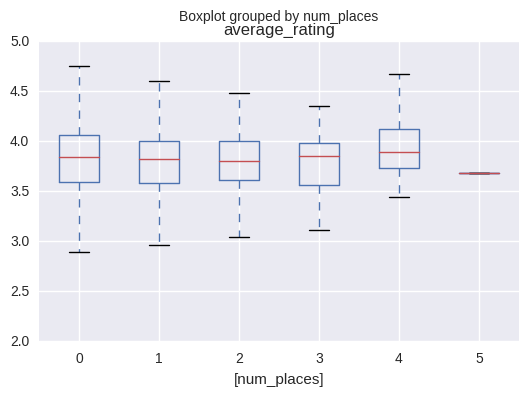

In [939]:
ar_to_sp.boxplot( by='num_places')
#ar_to_sp.num_places.value_counts()

In [1003]:
#MainDFCleaned[MainDFCleaned.publication_year == 2003].Genres.value_counts() / len(MainDFCleaned[MainDFCleaned.publication_year == 2003])

#pd.pivot_table(MainDFCleaned, MainDFCleaned.)
genre_lst = ['classic', 'poet', 'drama', 'fiction', 'essay', 'educ']

def getGenreGroup(genre_val):
    for gnr in genre_lst:
        if gnr in genre_val.lower():
            return gnr
    return 'other'

MainDFCleaned.loc[:, 'genre_group'] = MainDFCleaned.Genres.apply(getGenreGroup)

/home/kliton/.local/lib/python3.5/site-packages/pandas/core/indexing.py:296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/kliton/.local/lib/python3.5/site-packages/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [1018]:
pd.pivot_table(MainDFCleaned, values=np.ones((len(MainDFCleaned), 1)), index=['genre_group'], columns=['publication_year'], aggfunc=np.count_nonzero)

publication_year,1961,1964,1965,1966,1967,1968,1969,1970,1971,1972,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
genre_group,,,,,,,,,,,,,,,,,,,,,
classic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,2.0,NaN,NaN,2.0,NaN,NaN
drama,4.0,NaN,2.0,NaN,NaN,NaN,2.0,NaN,2.0,8.0,...,8.0,12.0,6.0,6.0,2.0,6.0,4.0,NaN,2.0,NaN
educ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,...,22.0,36.0,24.0,38.0,20.0,8.0,NaN,8.0,2.0,2.0
essay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,2.0,...,2.0,NaN,NaN,4.0,2.0,NaN,NaN,NaN,NaN,NaN
fiction,NaN,2.0,4.0,2.0,6.0,30.0,52.0,84.0,86.0,116.0,...,230.0,184.0,192.0,232.0,166.0,126.0,56.0,50.0,42.0,10.0
other,NaN,NaN,NaN,NaN,NaN,4.0,10.0,22.0,14.0,20.0,...,30.0,26.0,14.0,22.0,18.0,10.0,16.0,4.0,14.0,2.0
poet,NaN,NaN,NaN,NaN,2.0,6.0,6.0,18.0,10.0,22.0,...,28.0,16.0,32.0,22.0,24.0,12.0,4.0,4.0,4.0,NaN


In [734]:
stats.pearsonr(BookInfo.subject_place.apply(lambda x: len(eval(x)) if type(x) is str else np.NaN  )[~BookInfo.subject_place.isnull()], 
         BookInfo.average_rating[~BookInfo.subject_place.isnull()].values)  #BookInfo.subject_place.isnull().value_counts()

(-0.017982440250654496, 0.30881103598677972)

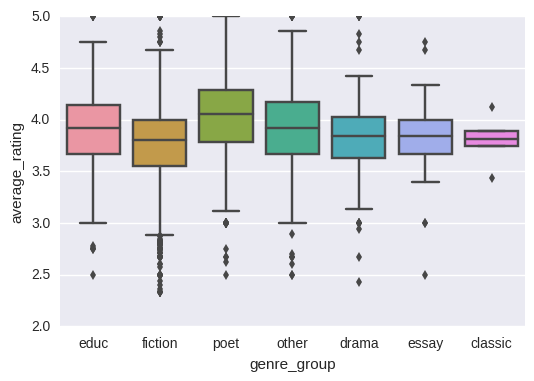

In [1021]:
sns.boxplot(x='genre_group', y='average_rating', data=MainDFCleaned)

In [745]:
stats.pearsonr(gr_book2.ratings_count.apply(np.log1p), gr_book2.average_rating)

(0.11620914656309118, 5.1859817796226813e-43)

In [797]:
#gr_book2[['publisher', 'average_rating']].groupby('publisher').mean().sort_values(by='average_rating', ascending=False)
stats.pearsonr(gr_book2.ratings_count[gr_book2.ratings_count > 1000], gr_book2.average_rating[gr_book2.ratings_count > 1000])

(0.13446687445442496, 0.019200227905467979)

In [803]:
MainDF.num_contributors.value_counts()

1     9822
2     1724
3      339
4       52
0       33
5        8
16       6
6        6
17       5
7        4
8        3
12       3
10       3
11       3
15       2
20       2
13       2
22       2
42       1
26       1
35       1
43       1
41       1
33       1
25       1
32       1
24       1
14       1
50       1
Name: num_contributors, dtype: int64

# Some more features

In [816]:
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

amazonDF = getDF('/home/kliton/Documents/Springboard/meta_Books.json.gz')

In [817]:
len(amazonDF)

2370585

In [835]:
amazonDroppedNA = amazonDF[~amazonDF.price.isnull()]

In [836]:
len(amazonDroppedNA)

1679410

In [860]:
amazonDroppedNA[['title', 'price']].groupby('title').mean()

,price
title,
"!!! A Fine Collection !!! Jeff Kinney Diary of a Wimpy Kid Series Collection Gift Set. Diary of a Wimpy Kid, the Ugly Truth, Dog Days, the Last Straw, Rodrick Rules, Do it",7.83
!Avancemos! Teacher's Edition (Level 4) by Ana C. Jarvis and Raquel Lebredo (Paperback - 2007),77.98
!Che Boludo! A gringo's guide to understanding the Argentines,6.08
!Expresate! (Holt Spanish 3): Cuaderno De Actividades (Activity Book),10.17
!Fish! La Eficacia de un Equipo Radica en Su Capacidad de Motivacion,13.46
"!Lagarto, lagarto! (Spanish Edition)",9.18
!Porque a m&iacute;!! (Volume 1) (Spanish Edition),13.50
"!Trato hecho!: Spanish for Real Life, Combined Edition",7.99
!WONTUOTEG second edition,12.59


In [861]:
jMDF = MainDF.join(amazonDroppedNA[['title', 'price']].groupby('title').mean(), on='title', lsuffix='_m', rsuffix='_am')

In [863]:
len(jMDF.price.dropna()) #[['title_m', 'title_am']]

2938

In [864]:
stats.pearsonr(jMDF[~jMDF.price.isnull()].price, jMDF[~jMDF.price.isnull()].average_rating)

(0.03160874682634629, 0.086712912522866059)